In [6]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Reading the csv file
df=pd.read_csv("D:\DOWNLOADS\credit_risk_dataset.csv")
df.head(20)

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target
0,7711117,1557197308,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557197074,19973049,199,438,-239,0.397391,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,1
1,7711123,1557197447,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557197308,19973188,200,439,-239,0.399063,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
2,7711126,1557197497,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557197447,19973238,201,440,-239,0.400895,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
3,7711672,1557204933,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1557191011,1557197545,13922,8,56,-48,0.604001,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0
4,7712572,1557217208,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1557216944,1557217154,264,2,3,-1,0.003008,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0
5,7715069,1557250486,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557197497,20026227,202,441,-239,0.402533,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
6,7715078,1557250631,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557250486,20026372,203,442,-239,0.404220,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
7,7715985,1557263239,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557263048,20038980,205,446,-241,0.406736,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
8,7716888,1557275580,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557275385,20051321,207,450,-243,0.410259,...,-0.893019,4.579614,34.254180,35.663011,-1.694858,0.071725,1.071725,1,1,1
9,7717003,1557277482,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557275580,20053223,208,451,-243,0.411663,...,-0.893019,4.579614,34.254180,35.663011,-1.694858,0.071725,1.071725,1,1,1


In [8]:
# Number of records and features
print("\nNumber of records: \n", df.shape[0])
print("\nNumber of features: \n", df.shape[1])


Number of records: 
 442961

Number of features: 
 78


In [9]:
print("\nColumn names:\n", df.columns.to_list())


Column names:
 ['borrow_block_number', 'borrow_timestamp', 'wallet_address', 'first_tx_timestamp', 'last_tx_timestamp', 'wallet_age', 'incoming_tx_count', 'outgoing_tx_count', 'net_incoming_tx_count', 'total_gas_paid_eth', 'avg_gas_paid_per_tx_eth', 'risky_tx_count', 'risky_unique_contract_count', 'risky_first_tx_timestamp', 'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff', 'risky_sum_outgoing_amount_eth', 'outgoing_tx_sum_eth', 'incoming_tx_sum_eth', 'outgoing_tx_avg_eth', 'incoming_tx_avg_eth', 'max_eth_ever', 'min_eth_ever', 'total_balance_eth', 'risk_factor', 'total_collateral_eth', 'total_collateral_avg_eth', 'total_available_borrows_eth', 'total_available_borrows_avg_eth', 'avg_weighted_risk_factor', 'risk_factor_above_threshold_daily_count', 'avg_risk_factor', 'max_risk_factor', 'borrow_amount_sum_eth', 'borrow_amount_avg_eth', 'borrow_count', 'repay_amount_sum_eth', 'repay_amount_avg_eth', 'repay_count', 'borrow_repay_diff_eth', 'deposit_count', 'deposit_amount_

In [10]:
# Checking percentage of null values

null_percent = round(df.isnull().mean() * 100, 2)
print(null_percent.sort_values(ascending=False))

borrow_block_number     0.0
market_adxr             0.0
market_correl           0.0
market_cmo              0.0
market_cci              0.0
                       ... 
total_collateral_eth    0.0
risk_factor             0.0
total_balance_eth       0.0
min_eth_ever            0.0
target                  0.0
Length: 78, dtype: float64


We notice that there are no null /missing values present in any of the features

In [11]:
# Checking features with single unique value
print("\nChecking if any feature has single unique value\n")
single_uniq_list = []
for col in df.columns:
  if (df[col].nunique()==1):
    print(f"{col} has single unique value\n")
    single_uniq_list.append(col)
  else:
    continue


if len(single_uniq_list)==0 :
  print("\nNo feature has single unique value\n")


Checking if any feature has single unique value


No feature has single unique value



 As no feature has single unique value , we wont drop any feature

In [12]:
# Checking if any 2 features are duplicated or not
duplicate_columns = {}
columns = df.columns

for i in range(len(columns)):
    for j in range(i):
        if df[columns[i]].equals(df[columns[j]]):
            duplicate_columns[columns[i]] = columns[j]
            break


print("\nDuplicate columns and their originals:")
for dup, orig in duplicate_columns.items():
    print(f"{dup} is a duplicate of {orig}")





Duplicate columns and their originals:
market_macd_macdext is a duplicate of market_apo


We will drop the columns present in Duplicate colums list.

In [13]:
duplicate_columns

{'market_macd_macdext': 'market_apo'}

In [14]:
# Dropping the duplicated column with the lowest correlation value with the target
#df.drop(columns=duplicate_columns, inplace=True)
from scipy.stats import spearmanr

columns_to_check = ['market_apo', 'market_macd_macdext']
target = 'target'

for col in columns_to_check:
    coef, _ = spearmanr(df[col], df[target])
    print(f"Spearman correlation between {col} and {target}: {round(coef, 4)}")


Spearman correlation between market_apo and target: -0.0054
Spearman correlation between market_macd_macdext and target: -0.0054


Since the spearman correlation of both columns are same , we will drop one of them here market_macd_macdext

In [15]:
# Dropping the duplicate columns
df.drop(columns=['market_macd_macdext'],inplace=True)

In [16]:
df.head()

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target
0,7711117,1557197308,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557197074,19973049,199,438,-239,0.397391,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,1
1,7711123,1557197447,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557197308,19973188,200,439,-239,0.399063,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
2,7711126,1557197497,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557197447,19973238,201,440,-239,0.400895,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
3,7711672,1557204933,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1557191011,1557197545,13922,8,56,-48,0.604001,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0
4,7712572,1557217208,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1557216944,1557217154,264,2,3,-1,0.003008,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0


In [17]:
#Printing the new columns list
new_col_list=df.columns.to_list()
print(f"\nColumn names:{new_col_list}")


Column names:['borrow_block_number', 'borrow_timestamp', 'wallet_address', 'first_tx_timestamp', 'last_tx_timestamp', 'wallet_age', 'incoming_tx_count', 'outgoing_tx_count', 'net_incoming_tx_count', 'total_gas_paid_eth', 'avg_gas_paid_per_tx_eth', 'risky_tx_count', 'risky_unique_contract_count', 'risky_first_tx_timestamp', 'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff', 'risky_sum_outgoing_amount_eth', 'outgoing_tx_sum_eth', 'incoming_tx_sum_eth', 'outgoing_tx_avg_eth', 'incoming_tx_avg_eth', 'max_eth_ever', 'min_eth_ever', 'total_balance_eth', 'risk_factor', 'total_collateral_eth', 'total_collateral_avg_eth', 'total_available_borrows_eth', 'total_available_borrows_avg_eth', 'avg_weighted_risk_factor', 'risk_factor_above_threshold_daily_count', 'avg_risk_factor', 'max_risk_factor', 'borrow_amount_sum_eth', 'borrow_amount_avg_eth', 'borrow_count', 'repay_amount_sum_eth', 'repay_amount_avg_eth', 'repay_count', 'borrow_repay_diff_eth', 'deposit_count', 'deposit_amount_su

In [18]:
df1=df.copy()

In [19]:
#Dropping the Target column from the original dataframe
df.drop(columns=['target'],inplace=True)
df

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
0,7711117,1557197308,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557197074,19973049,199,438,-239,0.397391,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
1,7711123,1557197447,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557197308,19973188,200,439,-239,0.399063,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
2,7711126,1557197497,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1537224259,1557197447,19973238,201,440,-239,0.400895,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
3,7711672,1557204933,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1557191011,1557197545,13922,8,56,-48,0.604001,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
4,7712572,1557217208,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1557216944,1557217154,264,2,3,-1,0.003008,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442956,18250961,1696106351,0x3dc6d0168838c40e26d105115908ee833b24e56a,1677567275,1696106267,18539076,68,91,-23,0.352223,...,-23.649733,-0.992921,3.327281,21.642831,116.954834,-0.430690,0.018477,1.018477,0,1
442957,18251701,1696115243,0x3af16178664dd4b2500c9d02c53347e86b3e7873,1624471432,1695934055,71643811,154,168,-14,1.382943,...,-23.649733,-0.992921,3.327281,21.642831,116.954834,-0.430690,0.018477,1.018477,1,1
442958,18251742,1696115735,0xba01430a43496df98956e42aab08eb85ca107bb1,1613776175,1696115627,82339560,163,310,-147,1.218006,...,-23.649733,-0.992921,3.327281,21.642831,116.954834,-0.430690,0.018477,1.018477,1,1
442959,18251864,1696117199,0x1f2b17bff4a0313ec6342eef464742ad1c2de83c,1671972839,1695932963,24144360,117,221,-104,0.738964,...,-23.649733,-0.992921,3.327281,21.642831,116.954834,-0.430690,0.018477,1.018477,1,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442961 entries, 0 to 442960
Data columns (total 76 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   borrow_block_number                      442961 non-null  int64  
 1   borrow_timestamp                         442961 non-null  int64  
 2   wallet_address                           442961 non-null  object 
 3   first_tx_timestamp                       442961 non-null  int64  
 4   last_tx_timestamp                        442961 non-null  int64  
 5   wallet_age                               442961 non-null  int64  
 6   incoming_tx_count                        442961 non-null  int64  
 7   outgoing_tx_count                        442961 non-null  int64  
 8   net_incoming_tx_count                    442961 non-null  int64  
 9   total_gas_paid_eth                       442961 non-null  float64
 10  avg_gas_paid_per_tx_eth         

In [21]:
#Determining the categorical and numerical columns
cat_col=df.select_dtypes(include=['object','category']).columns.to_list()
num_col=df.select_dtypes(include=['number']).columns.to_list()

print("\nCategorical columns :", cat_col)
print("\nNumerical columns :", num_col)


Categorical columns : ['wallet_address']

Numerical columns : ['borrow_block_number', 'borrow_timestamp', 'first_tx_timestamp', 'last_tx_timestamp', 'wallet_age', 'incoming_tx_count', 'outgoing_tx_count', 'net_incoming_tx_count', 'total_gas_paid_eth', 'avg_gas_paid_per_tx_eth', 'risky_tx_count', 'risky_unique_contract_count', 'risky_first_tx_timestamp', 'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff', 'risky_sum_outgoing_amount_eth', 'outgoing_tx_sum_eth', 'incoming_tx_sum_eth', 'outgoing_tx_avg_eth', 'incoming_tx_avg_eth', 'max_eth_ever', 'min_eth_ever', 'total_balance_eth', 'risk_factor', 'total_collateral_eth', 'total_collateral_avg_eth', 'total_available_borrows_eth', 'total_available_borrows_avg_eth', 'avg_weighted_risk_factor', 'risk_factor_above_threshold_daily_count', 'avg_risk_factor', 'max_risk_factor', 'borrow_amount_sum_eth', 'borrow_amount_avg_eth', 'borrow_count', 'repay_amount_sum_eth', 'repay_amount_avg_eth', 'repay_count', 'borrow_repay_diff_eth', 'dep

In [22]:
# We will see the number of unique values for categorical columns
for col in cat_col:
  print(f"\nColumn:{col}")
  print("\nCategories:",df[col].unique())
  print(f"\nnumber of unique values are {len(df[col].unique())}")


Column:wallet_address

Categories: ['0x502cb8985b2c92a8d4bf309cdaa89de9be442708'
 '0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6'
 '0xbd9ed130a53cfafcf81502e4d35329a6c4d53410' ...
 '0xa510430cf1efe09b20116d583be84e9a982bf2d4'
 '0xfca30e4549889d8358db090f246947953423671f'
 '0x3dc6d0168838c40e26d105115908ee833b24e56a']

number of unique values are 74476


Other features already have the data that the wallet adress contains (info obtained from the description given under dataset), so we will drop the wallet_address column.

In [23]:
#Dropping the wallet_adress column
df.drop(columns=['wallet_address'],inplace=True)
df1.drop(columns=['wallet_address'],inplace=True)
df.head()


,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
0,7711117,1557197308,1537224259,1557197074,19973049,199,438,-239,0.397391,0.000981,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
1,7711123,1557197447,1537224259,1557197308,19973188,200,439,-239,0.399063,0.000983,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
2,7711126,1557197497,1537224259,1557197447,19973238,201,440,-239,0.400895,0.000985,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1
3,7711672,1557204933,1557191011,1557197545,13922,8,56,-48,0.604001,0.010786,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1
4,7712572,1557217208,1557216944,1557217154,264,2,3,-1,0.003008,0.001003,...,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1


In [24]:
#Checking the stastical details of the num_cols
df[num_col].describe()

,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
count,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,442961.000000,4.429610e+05,442961.000000,442961.000000,442961.000000,...,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000
mean,1.304907e+07,1.629225e+09,1.593978e+09,1.629120e+09,3.524693e+07,777.858238,2.196224e+03,-1418.365727,26.898496,0.015685,...,23.478711,-0.650871,6.102657,23.324148,1062.136487,2.020113,0.038512,1.038512,0.975084,1.223742
std,2.231888e+06,2.972367e+07,4.485955e+07,2.970179e+07,3.828899e+07,2306.781076,2.803049e+04,27699.991076,141.471489,0.030737,...,107.338012,0.127519,2.281503,9.257275,21143.683448,8.304551,0.176627,0.176627,0.558809,0.443834
min,7.711117e+06,1.557197e+09,1.438270e+09,1.557197e+09,0.000000e+00,0.000000,0.000000e+00,-996456.000000,0.000000,0.000000,...,-288.690622,-0.992921,2.842363,4.674813,5.413265,-29.248726,-0.545814,0.454186,0.000000,0.000000
25%,1.162464e+07,1.610250e+09,1.570976e+09,1.610199e+09,6.621387e+06,39.000000,5.800000e+01,-273.000000,0.364798,0.005112,...,-26.736740,-0.736622,4.393287,15.907632,129.436901,-3.275724,-0.068142,0.931858,1.000000,1.000000
50%,1.270531e+07,1.624652e+09,1.601186e+09,1.624549e+09,2.120514e+07,158.000000,2.480000e+02,-62.000000,2.268351,0.010691,...,9.423609,-0.668490,5.569394,22.166548,333.246607,1.652219,0.023303,1.023303,1.000000,1.000000
75%,1.481634e+07,1.653123e+09,1.621893e+09,1.653021e+09,5.088168e+07,567.000000,9.210000e+02,-9.000000,12.675138,0.018049,...,87.762008,-0.608560,7.284896,29.496384,560.550257,7.337788,0.138449,1.138449,1.000000,1.000000
max,1.825192e+07,1.696118e+09,1.696060e+09,1.701649e+09,2.547487e+08,197999.000000,1.003714e+06,196374.000000,9951.709230,2.586824,...,391.719370,-0.361351,15.106064,56.729534,807296.000000,28.435216,0.768294,1.768294,4.000000,2.000000


In [25]:
#Scaling the num_cols using min max method
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[num_col]=scaler.fit_transform(df[num_col])
df[num_col]

,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
0,0.000000e+00,0.000000,0.383856,0.000000,0.078403,0.001005,0.000436,0.835171,3.993198e-05,0.000379,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.00,0.5
1,5.692165e-07,0.000001,0.383856,0.000002,0.078404,0.001010,0.000437,0.835171,4.009996e-05,0.000380,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.25,0.5
2,8.538248e-07,0.000001,0.383856,0.000003,0.078404,0.001015,0.000438,0.835171,4.028400e-05,0.000381,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.25,0.5
3,5.265253e-05,0.000055,0.461309,0.000003,0.000055,0.000040,0.000056,0.835331,6.069324e-05,0.004169,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.00,0.5
4,1.380350e-04,0.000143,0.461410,0.000139,0.000001,0.000010,0.000003,0.835371,3.022323e-07,0.000388,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442956,9.999089e-01,0.999917,0.928263,0.961627,0.072774,0.000343,0.000091,0.835352,3.539320e-05,0.001530,...,0.389531,0.000000,0.039541,0.325965,0.000138,0.499585,0.429410,0.429410,0.00,0.5
442957,9.999791e-01,0.999981,0.722298,0.960435,0.281233,0.000778,0.000167,0.835360,1.389653e-04,0.003300,...,0.389531,0.000000,0.039541,0.325965,0.000138,0.499585,0.429410,0.429410,0.25,0.5
442958,9.999830e-01,0.999985,0.680810,0.961691,0.323219,0.000823,0.000309,0.835248,1.223916e-04,0.001529,...,0.389531,0.000000,0.039541,0.325965,0.000138,0.499585,0.429410,0.429410,0.25,0.5
442959,9.999946e-01,0.999995,0.906561,0.960427,0.094777,0.000591,0.000220,0.835284,7.425502e-05,0.001785,...,0.389531,0.000000,0.039541,0.325965,0.000138,0.499585,0.429410,0.429410,0.25,0.5


In [26]:
# As no categorical columns now , so our final datframe will only contain the numerical columns
df_final=df[num_col]
df_final

,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
0,0.000000e+00,0.000000,0.383856,0.000000,0.078403,0.001005,0.000436,0.835171,3.993198e-05,0.000379,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.00,0.5
1,5.692165e-07,0.000001,0.383856,0.000002,0.078404,0.001010,0.000437,0.835171,4.009996e-05,0.000380,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.25,0.5
2,8.538248e-07,0.000001,0.383856,0.000003,0.078404,0.001015,0.000438,0.835171,4.028400e-05,0.000381,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.25,0.5
3,5.265253e-05,0.000055,0.461309,0.000003,0.000055,0.000040,0.000056,0.835331,6.069324e-05,0.004169,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.00,0.5
4,1.380350e-04,0.000143,0.461410,0.000139,0.000001,0.000010,0.000003,0.835371,3.022323e-07,0.000388,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442956,9.999089e-01,0.999917,0.928263,0.961627,0.072774,0.000343,0.000091,0.835352,3.539320e-05,0.001530,...,0.389531,0.000000,0.039541,0.325965,0.000138,0.499585,0.429410,0.429410,0.00,0.5
442957,9.999791e-01,0.999981,0.722298,0.960435,0.281233,0.000778,0.000167,0.835360,1.389653e-04,0.003300,...,0.389531,0.000000,0.039541,0.325965,0.000138,0.499585,0.429410,0.429410,0.25,0.5
442958,9.999830e-01,0.999985,0.680810,0.961691,0.323219,0.000823,0.000309,0.835248,1.223916e-04,0.001529,...,0.389531,0.000000,0.039541,0.325965,0.000138,0.499585,0.429410,0.429410,0.25,0.5
442959,9.999946e-01,0.999995,0.906561,0.960427,0.094777,0.000591,0.000220,0.835284,7.425502e-05,0.001785,...,0.389531,0.000000,0.039541,0.325965,0.000138,0.499585,0.429410,0.429410,0.25,0.5


In [27]:
# Correlation matrix
var_list = [col for col in df.columns]
df_temp = df[var_list]
print("\nChecking correlation amongst various variables\n")
corr_mat = df_temp.corr(method='spearman')
pd.DataFrame(corr_mat)



Checking correlation amongst various variables



,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
borrow_block_number,1.000000,1.000000,0.620694,0.999764,0.168417,-0.015843,0.038284,-0.057872,0.097712,0.097964,...,-0.190041,-0.143634,0.247850,-0.179565,0.247264,-0.215568,-0.162196,-0.162196,0.039837,0.152804
borrow_timestamp,1.000000,1.000000,0.620694,0.999764,0.168417,-0.015843,0.038284,-0.057872,0.097712,0.097964,...,-0.190041,-0.143634,0.247850,-0.179565,0.247264,-0.215568,-0.162196,-0.162196,0.039837,0.152804
first_tx_timestamp,0.620694,0.620694,1.000000,0.620868,-0.577815,-0.396663,-0.327595,0.234873,-0.232067,0.022511,...,-0.116452,-0.104138,0.160331,-0.098465,0.156458,-0.120946,-0.087580,-0.087580,-0.142456,-0.080339
last_tx_timestamp,0.999764,0.999764,0.620868,1.000000,0.167773,-0.013819,0.040506,-0.059943,0.099629,0.098257,...,-0.190420,-0.143757,0.248227,-0.179739,0.247038,-0.215864,-0.162411,-0.162411,0.039903,0.154085
wallet_age,0.168417,0.168417,-0.577815,0.167773,1.000000,0.557896,0.538035,-0.422441,0.453398,0.064535,...,-0.026680,-0.031358,-0.004144,-0.032593,0.003339,-0.037083,-0.038100,-0.038100,0.232144,0.231079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
market_ppo,-0.215568,-0.215568,-0.120946,-0.215864,-0.037083,0.037340,0.019090,-0.010170,0.060653,0.118631,...,0.814388,0.061670,-0.509328,0.700141,0.243911,1.000000,0.528026,0.528026,0.040050,0.005319
market_rocp,-0.162196,-0.162196,-0.087580,-0.162411,-0.038100,0.030768,0.012534,-0.007145,0.045609,0.088161,...,0.393856,0.088173,-0.412803,0.815477,0.291825,0.528026,1.000000,1.000000,0.043005,0.005774
market_rocr,-0.162196,-0.162196,-0.087580,-0.162411,-0.038100,0.030768,0.012534,-0.007145,0.045609,0.088161,...,0.393856,0.088173,-0.412803,0.815477,0.291825,0.528026,1.000000,1.000000,0.043005,0.005774
unique_borrow_protocol_count,0.039837,0.039837,-0.142456,0.039903,0.232144,0.492217,0.488929,-0.407797,0.513850,0.319548,...,0.075663,0.105288,-0.010592,0.033378,0.129167,0.040050,0.043005,0.043005,1.000000,0.582520


<Axes: >

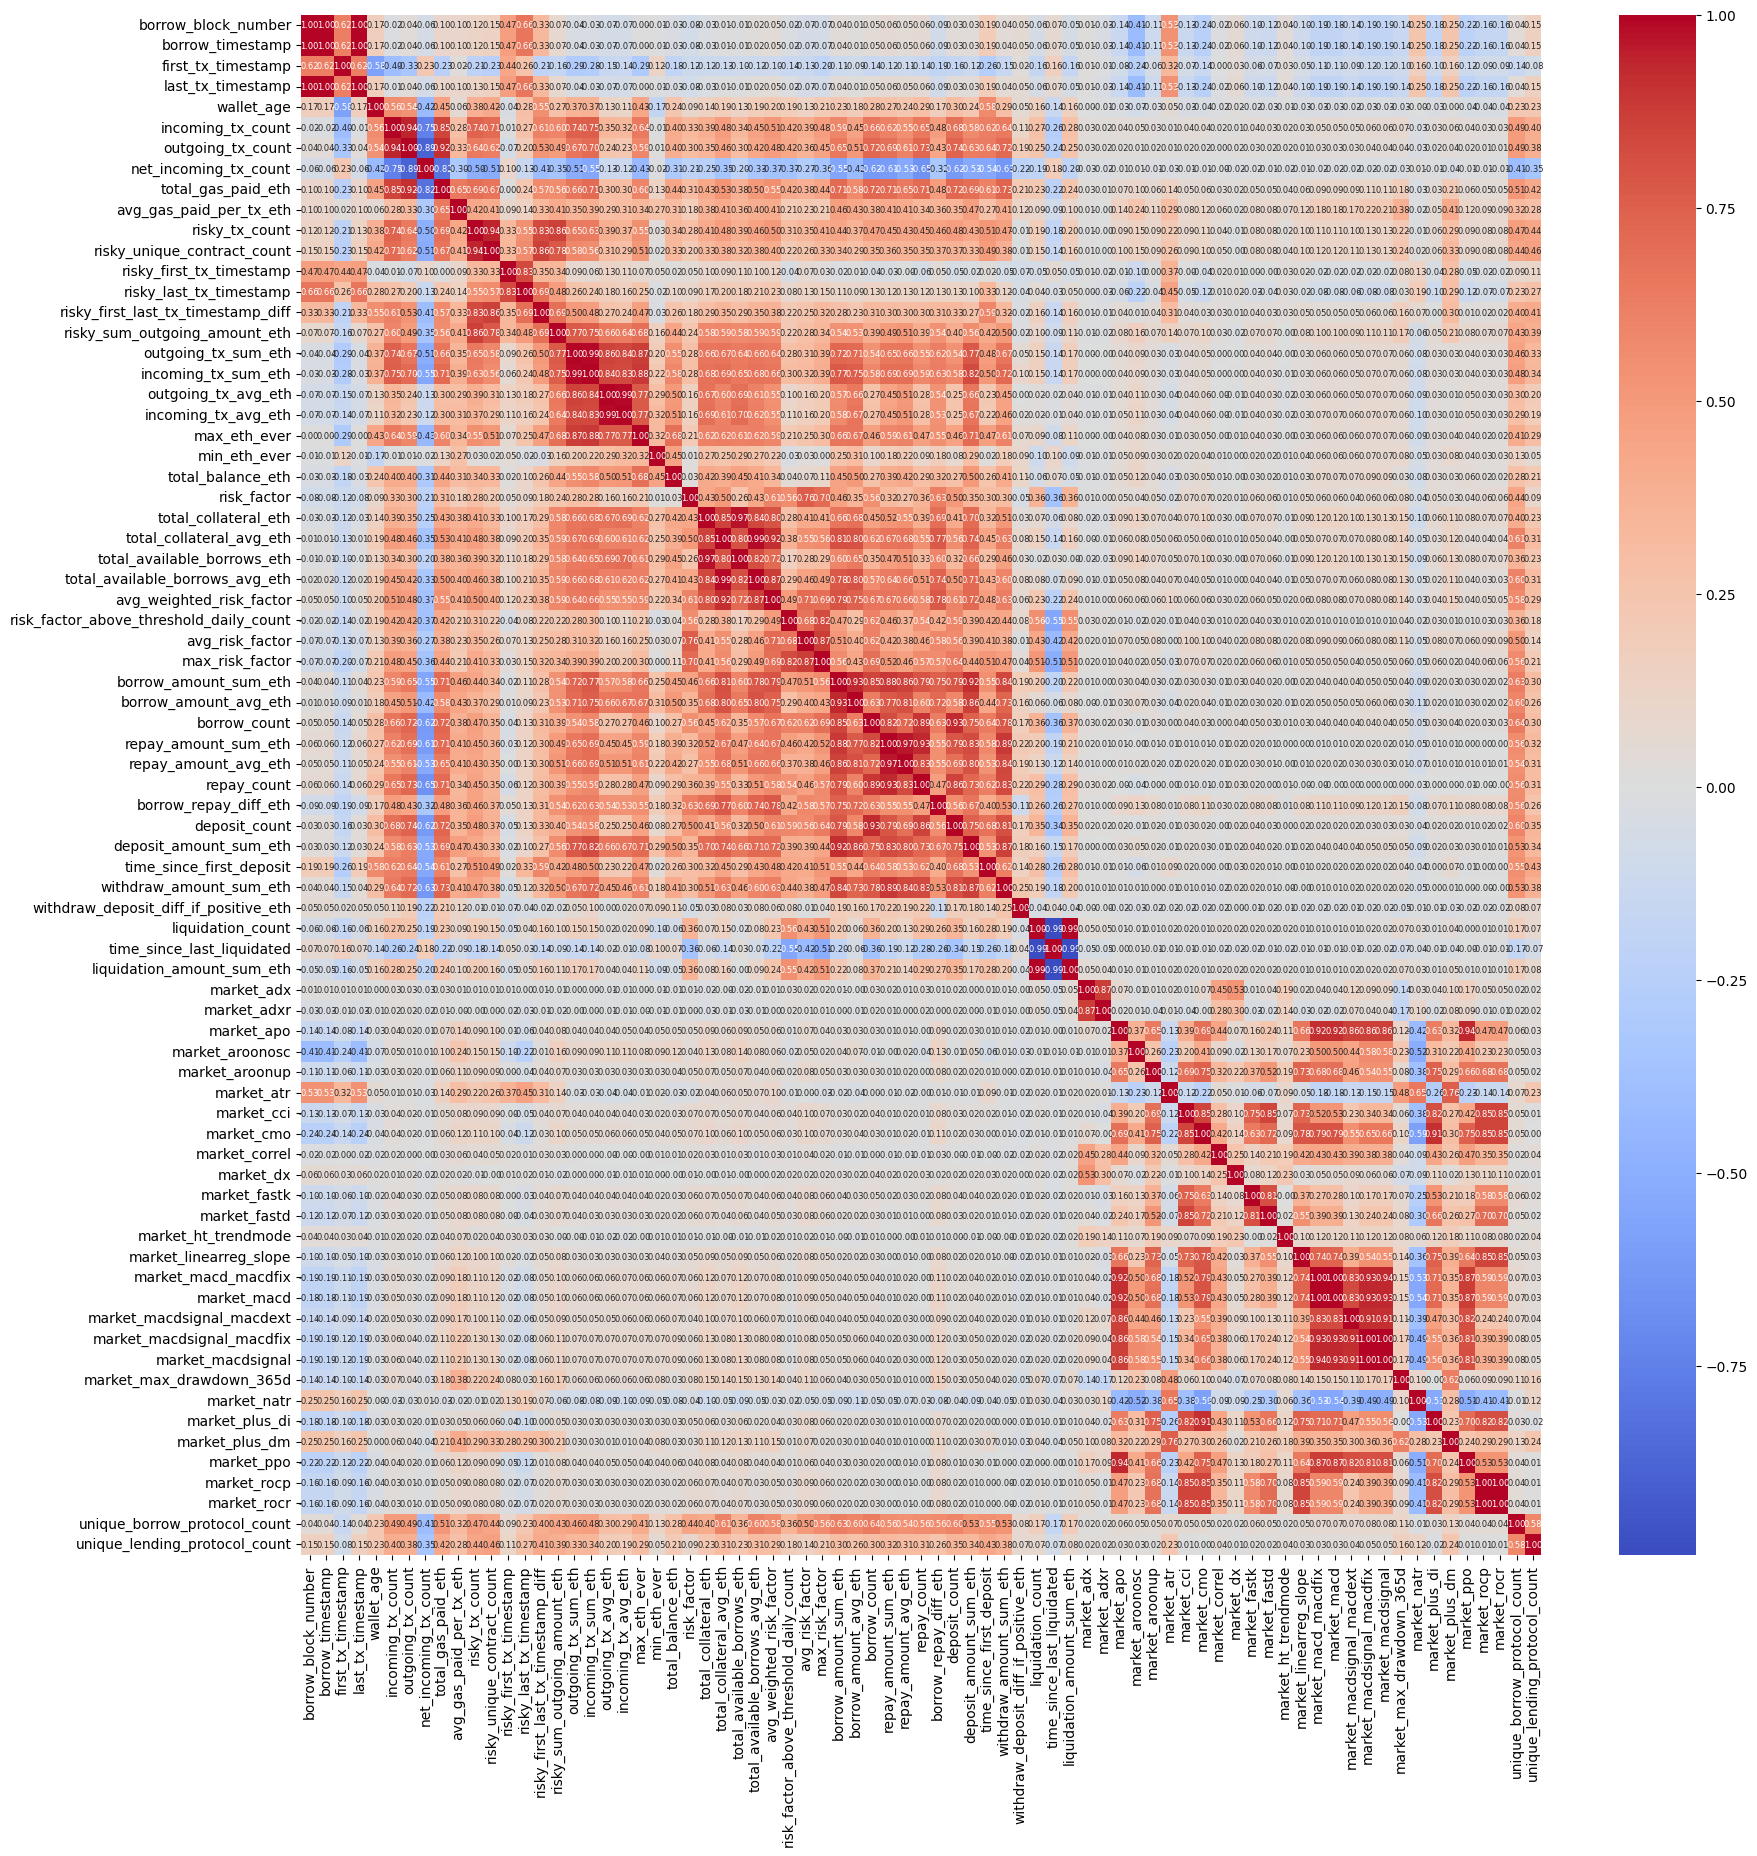

In [28]:
# Heat correlation map
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={"size": 6})

In [29]:
# Calculating on an average what are the correlations value ,so that we can decide the threshold for independent variables
corr_matrix = df.corr().abs()

for col in corr_matrix.columns:
    corr_matrix.loc[col, col] = None

all_correlations = corr_matrix.unstack().dropna()

unique_correlations = all_correlations[::2]
average_correlation = unique_correlations.mean()
print(f"Average absolute correlation between features: {average_correlation:.4f}")

Average absolute correlation between features: 0.0937


In [30]:
# Inorder to finout which one to drop among the categorical columns findout the correlation with the target wfor these columns and hwich ever one has the least drop it
# Find correlation of numerical columns with target and then do bining


# Calculate IV for the features keep the ones lying in between 10-50%
# Then perform RFE and PFI

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442961 entries, 0 to 442960
Data columns (total 75 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   borrow_block_number                      442961 non-null  float64
 1   borrow_timestamp                         442961 non-null  float64
 2   first_tx_timestamp                       442961 non-null  float64
 3   last_tx_timestamp                        442961 non-null  float64
 4   wallet_age                               442961 non-null  float64
 5   incoming_tx_count                        442961 non-null  float64
 6   outgoing_tx_count                        442961 non-null  float64
 7   net_incoming_tx_count                    442961 non-null  float64
 8   total_gas_paid_eth                       442961 non-null  float64
 9   avg_gas_paid_per_tx_eth                  442961 non-null  float64
 10  risky_tx_count                  

In [32]:
df['target']=df1['target']

def calculate_iv(df, feature, target, bins=10):
    try:
        df = df[[feature, target]].dropna()

        # Try to bin continuous variable
        if df[feature].nunique() > bins:
            try:
                df['bin'] = pd.qcut(df[feature], bins, duplicates='drop')
            except:
                df['bin'] = df[feature]  # fallback: no binning
        else:
            df['bin'] = df[feature]

        # Group by bin and calculate stats
        grouped = df.groupby('bin')[target].agg(['count', 'sum'])
        grouped.columns = ['total', 'events']
        grouped['non_events'] = grouped['total'] - grouped['events']

        # Event and non-event distribution
        grouped['dist_events'] = grouped['events'] / grouped['events'].sum()
        grouped['dist_non_events'] = grouped['non_events'] / grouped['non_events'].sum()

        # WOE and IV
        grouped['woe'] = np.log((grouped['dist_events'] + 1e-6) / (grouped['dist_non_events'] + 1e-6))
        grouped['iv'] = (grouped['dist_events'] - grouped['dist_non_events']) * grouped['woe']

        return grouped['iv'].sum() * 100  # Return IV as percentage

    except Exception as e:
        return f"Error: {str(e)}"

def calculate_iv_all_features(df, target):
    iv_dict = {}
    for col in df.columns:
        if col != target:
            iv = calculate_iv(df, col, target)
            iv_dict[col] = round(iv, 4) if isinstance(iv, float) else iv
    return pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV_%']).sort_values(by='IV_%', ascending=False)


iv_df = calculate_iv_all_features(df, target='target')
pd.reset_option('display.max_rows')
print(iv_df)


C:\Users\angsh\AppData\Local\Temp\ipykernel_13628\114894149.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum'])
C:\Users\angsh\AppData\Local\Temp\ipykernel_13628\114894149.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum'])
C:\Users\angsh\AppData\Local\Temp\ipykernel_13628\114894149.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

                                             IV_%
risk_factor                              187.7750
max_risk_factor                          117.9842
avg_risk_factor                          108.8545
risk_factor_above_threshold_daily_count   83.2993
time_since_last_liquidated                47.4269
...                                           ...
market_fastk                               0.1746
market_cci                                 0.1675
unique_lending_protocol_count              0.1197
market_ht_trendmode                        0.0001
withdraw_deposit_diff_if_positive_eth      0.0000

[75 rows x 1 columns]


Keep those features lying in between 10-50%

In [33]:
# Retaining the features which have IV value lying in 10-50%
low_iv_threshold = 10
high_iv_threshold = 50

final_features = iv_df[(iv_df['IV_%'] >= low_iv_threshold) & (iv_df['IV_%'] <= high_iv_threshold)].index.tolist()
#extra_features=iv_df[(iv_df['IV_%'] > high_iv_threshold)].index.tolist()
#df_filtered = df[final_features+extra_features + ['target']]

df_filtered = df[final_features + ['target']]
print("Final shape of filtered dataset:", df_filtered.shape)

print(f"final features:{final_features}")



Final shape of filtered dataset: (442961, 9)
final features:['time_since_last_liquidated', 'liquidation_count', 'liquidation_amount_sum_eth', 'borrow_count', 'deposit_count', 'borrow_repay_diff_eth', 'avg_weighted_risk_factor', 'total_available_borrows_avg_eth']


### MODEL DEVELOPMENT

In [35]:

#Model development
from sklearn.model_selection import train_test_split, StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [36]:
#Defining features and targets
y=df1['target']
X=df_final
X

,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
0,0.000000e+00,0.000000,0.383856,0.000000,0.078403,0.001005,0.000436,0.835171,3.993198e-05,0.000379,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.00,0.5
1,5.692165e-07,0.000001,0.383856,0.000002,0.078404,0.001010,0.000437,0.835171,4.009996e-05,0.000380,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.25,0.5
2,8.538248e-07,0.000001,0.383856,0.000003,0.078404,0.001015,0.000438,0.835171,4.028400e-05,0.000381,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.25,0.5
3,5.265253e-05,0.000055,0.461309,0.000003,0.000055,0.000040,0.000056,0.835331,6.069324e-05,0.004169,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.00,0.5
4,1.380350e-04,0.000143,0.461410,0.000139,0.000001,0.000010,0.000003,0.835371,3.022323e-07,0.000388,...,0.426071,0.153602,0.133483,0.548304,0.000035,0.465959,0.494715,0.494715,0.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442956,9.999089e-01,0.999917,0.928263,0.961627,0.072774,0.000343,0.000091,0.835352,3.539320e-05,0.001530,...,0.389531,0.000000,0.039541,0.325965,0.000138,0.499585,0.429410,0.429410,0.00,0.5
442957,9.999791e-01,0.999981,0.722298,0.960435,0.281233,0.000778,0.000167,0.835360,1.389653e-04,0.003300,...,0.389531,0.000000,0.039541,0.325965,0.000138,0.499585,0.429410,0.429410,0.25,0.5
442958,9.999830e-01,0.999985,0.680810,0.961691,0.323219,0.000823,0.000309,0.835248,1.223916e-04,0.001529,...,0.389531,0.000000,0.039541,0.325965,0.000138,0.499585,0.429410,0.429410,0.25,0.5
442959,9.999946e-01,0.999995,0.906561,0.960427,0.094777,0.000591,0.000220,0.835284,7.425502e-05,0.001785,...,0.389531,0.000000,0.039541,0.325965,0.000138,0.499585,0.429410,0.429410,0.25,0.5


In [41]:
#Splitting the data using train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [43]:
# Convert arrays to DataFrames if they aren't already
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Save training data
X_train_df.to_csv('X_train.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)

# Save testing data
X_test_df.to_csv('X_test.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)

# Optional: Save combined training and testing datasets
# Combine X and y for training set
train_combined = pd.concat([X_train_df, y_train_df], axis=1)
train_combined.to_csv('train_data_combined.csv', index=False)

# Combine X and y for testing set
test_combined = pd.concat([X_test_df, y_test_df], axis=1)
test_combined.to_csv('test_data_combined.csv', index=False)

print("Files saved successfully!")
print("Individual files:")
print("- X_train.csv (training features)")
print("- y_train.csv (training labels)")
print("- X_test.csv (testing features)")
print("- y_test.csv (testing labels)")
print("\nCombined files:")
print("- train_data_combined.csv (training features + labels)")
print("- test_data_combined.csv (testing features + labels)")

Files saved successfully!
Individual files:
- X_train.csv (training features)
- y_train.csv (training labels)
- X_test.csv (testing features)
- y_test.csv (testing labels)

Combined files:
- train_data_combined.csv (training features + labels)
- test_data_combined.csv (testing features + labels)


In [81]:
X_train

,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,...,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
81594,0.328724,0.339062,0.633197,0.325919,0.010983,0.000313,0.000062,0.835371,0.000060,0.003720,...,0.435567,0.513689,0.126465,0.287413,0.000049,0.572547,0.383322,0.383322,0.25,0.5
234219,0.485907,0.497940,0.729664,0.478870,0.000004,0.000010,0.000002,0.835371,0.000002,0.003021,...,0.330295,0.608581,0.650351,0.209706,0.000456,0.558678,0.308042,0.308042,0.00,0.5
65773,0.281661,0.291559,0.614689,0.280392,0.003807,0.000025,0.000014,0.835364,0.000027,0.007471,...,0.476661,0.513689,0.020598,0.563931,0.000115,0.703810,0.490153,0.490153,0.25,0.5
260239,0.514155,0.526782,0.669695,0.506608,0.076418,0.001404,0.000356,0.835305,0.000631,0.006796,...,0.661807,0.608581,0.261703,0.285128,0.000580,0.542446,0.400866,0.400866,0.25,0.5
305737,0.620461,0.635428,0.478091,0.610192,0.329556,0.007429,0.001964,0.834952,0.004087,0.008022,...,0.396569,0.608581,0.415650,0.287359,0.000600,0.563982,0.304366,0.304366,0.25,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.511831,0.524422,0.736014,0.504340,0.008019,0.000030,0.000003,0.835374,0.000002,0.003160,...,0.708987,0.608581,0.288314,0.299631,0.000630,0.577566,0.401804,0.401804,0.00,0.5
365838,0.735740,0.756007,0.253373,0.727053,0.622712,0.004349,0.000916,0.835323,0.000545,0.002286,...,0.389626,0.278845,0.367324,0.341850,0.000379,0.375778,0.376484,0.376484,0.00,0.5
131932,0.389508,0.400256,0.655362,0.384929,0.021924,0.009354,0.002142,0.835122,0.004289,0.007675,...,0.611048,0.513689,0.165002,0.441405,0.000648,0.659257,0.576246,0.576246,0.25,0.5
146867,0.404445,0.415324,0.637152,0.399418,0.048568,0.000470,0.000124,0.835345,0.000154,0.004820,...,0.455834,0.591686,0.290476,0.240356,0.000464,0.404340,0.273916,0.273916,0.25,0.5


In [82]:
y_train

81594     0
234219    1
65773     0
260239    1
305737    1
         ..
259178    0
365838    0
131932    0
146867    1
121958    1
Name: target, Length: 332220, dtype: int64

In [34]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# hyperopt for bayesian optimisation
import hyperopt
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

In [36]:
#BASE MODEL
# Defining the space/range of values  for hyper parameters
space={
    'max_depth': hp.choice("max_depth", [3, 4, 5, 6, 8, 10, 12, 15]),
    'reg_alpha':hp.quniform("reg_alpha",40,180,1),
    'reg_lambda':hp.uniform("reg_lambda",0,1),
    'gamma':hp.uniform("gamma",0,9),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree':hp.uniform("colsample_bytree",0.5,1),
    'min_child_weight':hp.quniform("min_child_weight",0,10,1),
    'n_estimators' : hp.choice('n_estimators', [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]),
    'learning_rate':hp.uniform("learning_rate",0,0.3),
    'scale_pos_weight': hp.quniform('scale_pos_weight', int(0), int(sum(df1['target'] == 0) / sum(df1['target'] == 1)), 1)

}

# TRIAL 1

#### TRIAL 1 - changing distribution of reg_alpha and reg_lambda

In [37]:
# Defining the space/range of values  for hyper parameters
space={
    'max_depth': hp.choice("max_depth", [3, 4, 5, 6, 8, 10, 12, 15]),
    'reg_alpha':hp.loguniform('reg_alpha', np.log(1e-5), np.log(10)),
    'reg_lambda':hp.loguniform('reg_lambda', np.log(1e-5), np.log(100)),
    'gamma':hp.uniform("gamma",0,9),
    'colsample_bytree':hp.uniform("colsample_bytree",0.5,1),
    'min_child_weight':hp.quniform("min_child_weight",0,10,1),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'n_estimators' : hp.choice('n_estimators', [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]),
    'learning_rate':hp.uniform("learning_rate",0,0.3),
    'scale_pos_weight': hp.quniform('scale_pos_weight', int(0), int(sum(df1['target'] == 0) / sum(df1['target'] == 1)), 1)

}

look for the different distributios possible for the min_child_weight,reg_alpha,reg_lamda,max_depth(like uniform ,quniform,loguniform,beta)

In [38]:
# Xgboost Classifier model and training
gini=0
def hyperparameter_tuning(space):
  global gini
  model=XGBClassifier(
      n_estimators=space['n_estimators'],
      max_depth=int(space['max_depth']),
      gamma = space['gamma'],
      reg_alpha = space['reg_alpha'],
      reg_lambda=space['reg_lambda'],
      subsample = space['subsample'],
      min_child_weight=space['min_child_weight'],
      colsample_bytree=space['colsample_bytree'],
      learning_rate=space['learning_rate'],
      scale_pos_weight=space['scale_pos_weight'],
      random_state=42,
      eval_metric='auc'
  )
  model.fit(X_train,y_train)
  proba = model.predict_proba(X_test)[:, 1]
  auc = roc_auc_score(y_test, proba)
  gini=max(gini,(2*auc)-1)
  print("AUC:", auc)
  return {'loss': -auc, 'status': STATUS_OK, 'model': model}

In [39]:
#Running Hyperopt
# Trial1_Test
trials=Trials()
best=fmin(fn=hyperparameter_tuning,space=space,algo= tpe.suggest,max_evals=50, trials=trials)
best_params_df = pd.DataFrame([best]).T
best_params_df.columns = ['Value']
best_params_df.index.name = 'Hyperparameter'

print("Best Hyperparameters:\n")
print(best_params_df)


print(f"Best gini:{gini} ")

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

AUC:                                                  
0.9312303350836759                                    
AUC:                                                                             
0.5                                                                              
AUC:                                                                             
0.8833437125561445                                                               
AUC:                                                                             
0.5                                                                              
AUC:                                                                             
0.5                                                                              
AUC:                                                                             
0.5                                                                              
AUC:                                                                  

In [40]:
best_params_df

,Value
Hyperparameter,
colsample_bytree,0.590137
gamma,1.395684
learning_rate,0.076066
max_depth,6.000000
min_child_weight,9.000000
n_estimators,4.000000
reg_alpha,0.027723
reg_lambda,0.000011
scale_pos_weight,1.000000


In [ ]:
from xgboost.sklearn import XGBClassifier

xgb_clf1 = XGBClassifier(
 colsample_bytree = 0.757098 ,
 gamma = 0.050929,
 learning_rate = 0.252015,
 max_depth = 10,
 min_child_weight = 4.00,
 n_estimators = 1000,
 reg_alpha = 0.025520,
 reg_lambda = 45.207416,
 scale_pos_weight = 1.000,
 subsample = 0.755981,
 seed=123
    
)

xgb_clf1.fit(X_train, y_train)
xgb_clf_predicted_proba_test = xgb_clf1.predict_proba(X_test)
xgb_clf_prediction = xgb_clf1.predict(X_test)

predicted_probabilities_test = [i for i in xgb_clf_predicted_proba_test]

xgb_clf_predicted_proba_train = xgb_clf1.predict_proba(X_train)
predicted_probabilities_train = [i for i in xgb_clf_predicted_proba_train]

#Train Gini Calculation

In [105]:
# Calculating train gini
df_train = pd.DataFrame(y_train)
df_train.columns = ['Target']
df_predicted_train = pd.DataFrame({'Predictions':predicted_probabilities_train})
predicted_train = pd.concat([df_predicted_train.reset_index(drop=True), df_train.reset_index(drop=True)], axis=1, join='outer')
predicted_train.columns = ['Predictions','Target']

ser, bins = pd.qcut(predicted_train['Predictions'].apply(lambda x: x[1]), 5, retbins=True, duplicates='drop')
predicted_train_bins = pd.concat([predicted_train, ser], axis=1, join='outer')
predicted_train_bins.columns = ['Predictions','Target','Bands']
probability_table_train = pd.DataFrame(predicted_train_bins.groupby(['Bands'])['Target'].sum())
counts_train = pd.DataFrame(predicted_train_bins.groupby(['Bands']).size().reset_index(name='Counts'))
counts_train.set_index('Bands', inplace=True)

Train_summary = pd.concat([counts_train, probability_table_train], axis=1)


Train_summary['Population%'] =( Train_summary['Counts']/Train_summary['Counts'].sum())*100
Train_summary['Bad%'] = (Train_summary['Target']/Train_summary['Counts'])*100
Train_summary['Band_Bad_capture%'] = (Train_summary['Target']/Train_summary['Target'].sum())*100
Train_summary['Bad_Capture_%'] = ((Train_summary['Target']/Train_summary['Target'].sum())*100).cumsum()
Train_summary['Good_Capture_%'] = ((Train_summary['Counts']-Train_summary['Target'])/(Train_summary['Counts']-Train_summary['Target']).sum()).cumsum()*100
Train_summary['KS'] = np.abs(Train_summary['Good_Capture_%']-Train_summary['Bad_Capture_%'])
Train_summary['Gini'] = (Train_summary['Bad_Capture_%'] + Train_summary['Bad_Capture_%'].shift(1).fillna(0))*(Train_summary['Good_Capture_%'] - Train_summary['Good_Capture_%'].shift(1).fillna(0))*(0.5/100.00)
train_gini = 2*np.abs(0.5-(np.sum(Train_summary['Gini'])/100))*100
print("\nTrain Gini = ", train_gini,"%")





Train Gini =  98.14854751475323 %


C:\Users\angsh\AppData\Local\Temp\ipykernel_11452\1895255795.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probability_table_train = pd.DataFrame(predicted_train_bins.groupby(['Bands'])['Target'].sum())
C:\Users\angsh\AppData\Local\Temp\ipykernel_11452\1895255795.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_train = pd.DataFrame(predicted_train_bins.groupby(['Bands']).size().reset_index(name='Counts'))


In [106]:
Train_summary

,Counts,Target,Population%,Bad%,Band_Bad_capture%,Bad_Capture_%,Good_Capture_%,KS,Gini
Bands,,,,,,,,,
"(-0.00099863, 0.0041]",66444,0,20.0,0.000000,0.000000,0.000000,32.011794,3.201179e+01,0.000000
"(0.0041, 0.0232]",66444,0,20.0,0.000000,0.000000,0.000000,64.023588,6.402359e+01,0.000000
"(0.0232, 0.132]",66444,0,20.0,0.000000,0.000000,0.000000,96.035382,9.603538e+01,0.000000
"(0.132, 0.983]",66444,58215,20.0,87.615135,46.699396,46.699396,100.000000,5.330060e+01,0.925726
"(0.983, 1.0]",66444,66444,20.0,100.000000,53.300604,100.000000,100.000000,1.421085e-14,0.000000


#Test Gini Calculation

In [107]:

# Test Gini Calculation

df_test = pd.DataFrame(y_test)
df_test.columns = ['Target']
df_predicted_test = pd.DataFrame({'Predictions':predicted_probabilities_test})
predicted_test = pd.concat([df_predicted_test.reset_index(drop=True), df_test.reset_index(drop=True)], axis=1, join='outer')
predicted_test.columns = ['Predictions','Target']


bins[0] = 0
bins[-1] = 1
bins_test = pd.cut(predicted_test['Predictions'].apply(lambda x: x[1]), bins=bins, include_lowest=True)
predicted_test_bins = pd.concat([predicted_test, bins_test], axis=1, join='outer')
predicted_test_bins.columns = ['Predictions','Target','Bands']
probability_table_test = pd.DataFrame(predicted_test_bins.groupby(['Bands'])['Target'].sum())
counts_test = pd.DataFrame(predicted_test_bins.groupby(['Bands']).size().reset_index(name='Counts'))
counts_test.set_index('Bands', inplace=True)

Test_summary = pd.concat([counts_test, probability_table_test], axis=1)




Test_summary['Population%'] =( Test_summary['Counts']/Test_summary['Counts'].sum())*100
Test_summary['Bad%'] = (Test_summary['Target']/Test_summary['Counts'])*100
Test_summary['Band_Bad_capture%'] = (Test_summary['Target']/Test_summary['Target'].sum())*100
Test_summary['Bad_Capture_%'] = ((Test_summary['Target']/Test_summary['Target'].sum())*100).cumsum()
Test_summary['Good_Capture_%'] = ((Test_summary['Counts']-Test_summary['Target'])/(Test_summary['Counts']-Test_summary['Target']).sum()).cumsum()*100
Test_summary['KS'] = np.abs(Test_summary['Good_Capture_%']-Test_summary['Bad_Capture_%'])
Test_summary['Gini'] = (Test_summary['Bad_Capture_%'] + Test_summary['Bad_Capture_%'].shift(1).fillna(0))*(Test_summary['Good_Capture_%'] - Test_summary['Good_Capture_%'].shift(1).fillna(0))*(0.5/100.00)
test_gini = 2*np.abs(0.5-(np.sum(Test_summary['Gini'])/100))*100
print("\nTest Gini = ", test_gini,"%")





Test Gini =  85.98476124221868 %


C:\Users\angsh\AppData\Local\Temp\ipykernel_11452\3965810798.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probability_table_test = pd.DataFrame(predicted_test_bins.groupby(['Bands'])['Target'].sum())
C:\Users\angsh\AppData\Local\Temp\ipykernel_11452\3965810798.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_test = pd.DataFrame(predicted_test_bins.groupby(['Bands']).size().reset_index(name='Counts'))


So we got Train Gini= 98.1485 % and Test Gini=85.9847%

In [45]:
from scipy.stats import chi2

### MCC Calculation

In [128]:
#Matthews Correlation Coefficient (MCC) for Train and Test
from sklearn.metrics import matthews_corrcoef
import numpy as np
import pandas as pd
from scipy.stats import chi2

# MCC for Train set
xgb_clf_prediction_train = xgb_clf1.predict(X_train)
mcc_train = matthews_corrcoef(y_train, xgb_clf_prediction_train)
print(f"Train MCC = {mcc_train:.4f}")

# MCC for Test set  
mcc_test = matthews_corrcoef(y_test, xgb_clf_prediction)
print(f"Test MCC = {mcc_test:.4f}")


Train MCC = 0.9986
Test MCC = 0.7178


Train MCC = 0.7847
Test MCC = 0.7178


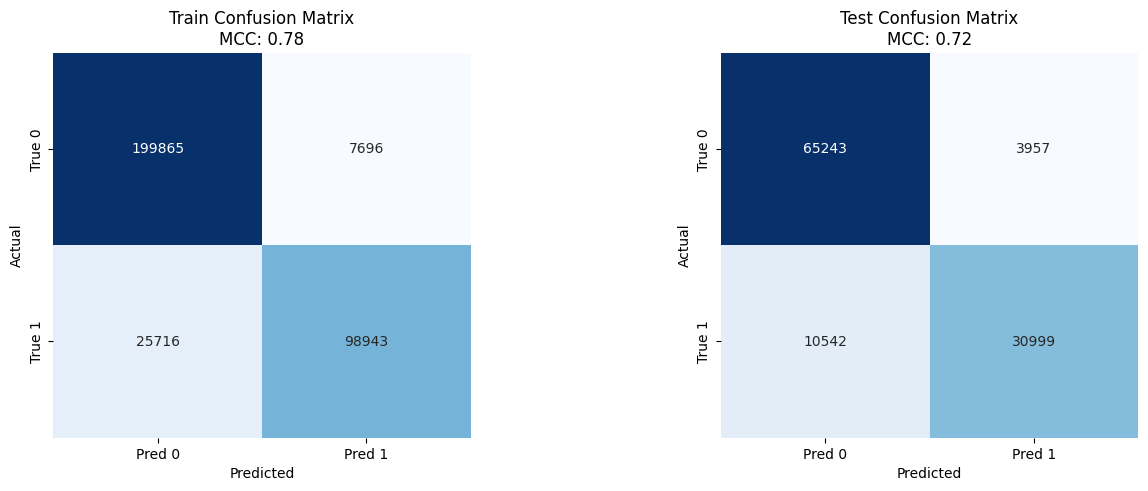

In [ ]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Predictions and MCC ===
xgb_clf_prediction_train = xgb_clf1.predict(X_train)
xgb_clf_prediction_test = xgb_clf1.predict(X_test)

mcc_train = matthews_corrcoef(y_train, xgb_clf_prediction_train)
mcc_test = matthews_corrcoef(y_test, xgb_clf_prediction_test)

print(f"Train MCC = {mcc_train:.4f}")
print(f"Test MCC = {mcc_test:.4f}")

# === Confusion Matrices ===
cm_train = confusion_matrix(y_train, xgb_clf_prediction_train)
cm_test = confusion_matrix(y_test, xgb_clf_prediction_test)

# === Side-by-side Confusion Matrix Plots ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train CM
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'], ax=axes[0])
axes[0].set_title(f"Train Confusion Matrix\nMCC: {mcc_train:.2f}")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Test CM
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'], ax=axes[1])
axes[1].set_title(f"Test Confusion Matrix\nMCC: {mcc_test:.2f}")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Add spacing between subplots
fig.subplots_adjust(wspace=0.6)  # increase this if needed
plt.show()


### Brier score

In [129]:
from sklearn.metrics import brier_score_loss

# Probabilistic predictions for Train and Test
y_train_proba = xgb_clf1.predict_proba(X_train)[:, 1]  # Probability of the positive class
y_test_proba = xgb_clf1.predict_proba(X_test)[:, 1]

# Brier Score for Train set
brier_score_train = brier_score_loss(y_train, y_train_proba)
print(f"Train Brier Score = {brier_score_train:.4f}")

# Brier Score for Test set
brier_score_test = brier_score_loss(y_test, y_test_proba)
print(f"Test Brier Score = {brier_score_test:.4f}")

Train Brier Score = 0.0051
Test Brier Score = 0.0718


Train Brier Score = 0.0051
Test Brier Score = 0.0718


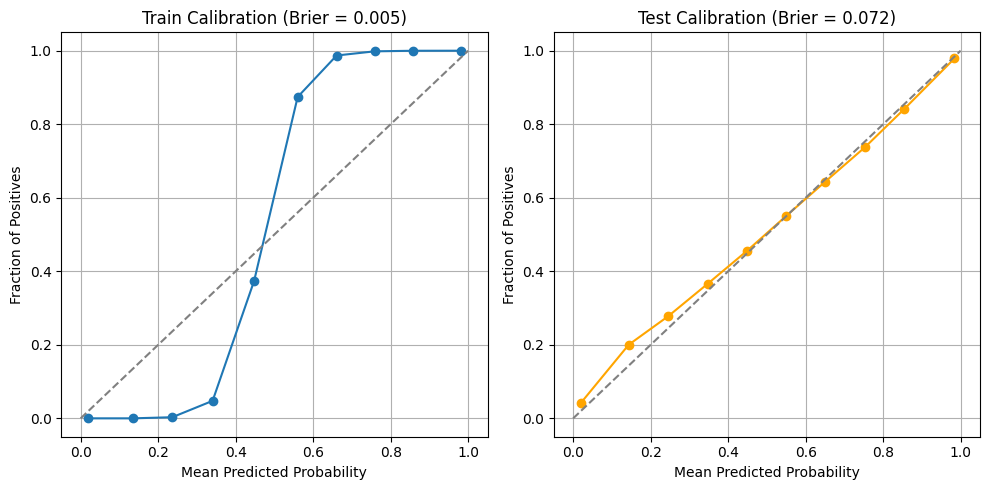

In [130]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Existing Brier Score Code
from sklearn.metrics import brier_score_loss

y_train_proba = xgb_clf1.predict_proba(X_train)[:, 1]
y_test_proba = xgb_clf1.predict_proba(X_test)[:, 1]

brier_score_train = brier_score_loss(y_train, y_train_proba)
brier_score_test = brier_score_loss(y_test, y_test_proba)

print(f"Train Brier Score = {brier_score_train:.4f}")
print(f"Test Brier Score = {brier_score_test:.4f}")

# Calibration Curve Data
prob_true_train, prob_pred_train = calibration_curve(y_train, y_train_proba, n_bins=10)
prob_true_test, prob_pred_test = calibration_curve(y_test, y_test_proba, n_bins=10)

# Plot
plt.figure(figsize=(10, 5))

# Train Plot
plt.subplot(1, 2, 1)
plt.plot(prob_pred_train, prob_true_train, marker='o', label='Train')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'Train Calibration (Brier = {brier_score_train:.3f})')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.grid()

# Test Plot
plt.subplot(1, 2, 2)
plt.plot(prob_pred_test, prob_true_test, marker='o', color='orange', label='Test')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'Test Calibration (Brier = {brier_score_test:.3f})')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.grid()

plt.tight_layout()
plt.show()


### DPI

In [131]:
import numpy as np

def discriminatory_power_index(y_true, y_proba):
    pos_avg = np.mean(y_proba[y_true == 1])
    neg_avg = np.mean(y_proba[y_true == 0])
    return pos_avg - neg_avg

dpi_train = discriminatory_power_index(y_train, y_train_proba)
dpi_test = discriminatory_power_index(y_test, y_test_proba)
print(f"Train DPI = {dpi_train:.4f}")
print(f"Test DPI = {dpi_test:.4f}")


Train DPI = 0.9197
Test DPI = 0.7190


# Trial 2

#### TRIAL 2- changing distribution of gamma

In [50]:


import math

space2={
  
    'max_depth': hp.choice("max_depth", [3, 4, 5, 6, 8, 10, 12, 15]),
    'reg_alpha':hp.quniform("reg_alpha",40,180,1),
    'reg_lambda':hp.uniform("reg_lambda",0,1),
    'gamma':hp.loguniform("gamma",np.log(1e-3),np.log(10)),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree':hp.uniform("colsample_bytree",0.5,1),
    'min_child_weight':hp.quniform("min_child_weight",0,10,1),
    'n_estimators' : hp.choice('n_estimators', [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]),
    'learning_rate':hp.uniform("learning_rate",0,0.3),
    'scale_pos_weight': hp.quniform('scale_pos_weight', int(0), int(sum(df1['target'] == 0) / sum(df1['target'] == 1)), 1)



}





In [51]:
# Xgboost Classifier model and training
gini=0
def hyperparameter_tuning(space):
  global gini
  model=XGBClassifier(
      n_estimators=space['n_estimators'],
      max_depth=int(space['max_depth']),
      gamma = space['gamma'],
      reg_alpha = space['reg_alpha'],
      reg_lambda=space['reg_lambda'],
      subsample = space['subsample'],
      min_child_weight=space['min_child_weight'],
      colsample_bytree=space['colsample_bytree'],
      learning_rate=space['learning_rate'],
      scale_pos_weight=space['scale_pos_weight'],
      random_state=42,
      eval_metric='auc'
  )
  model.fit(X_train,y_train)
  proba = model.predict_proba(X_test)[:, 1]
  auc = roc_auc_score(y_test, proba)
  gini=max(gini,(2*auc)-1)
  print("AUC:", auc)
  return {'loss': -auc, 'status': STATUS_OK, 'model': model}

In [52]:
#Running Hyperopt
# Trial1_Test
trials=Trials()
best=fmin(fn=hyperparameter_tuning,space=space2,algo= tpe.suggest,max_evals=50, trials=trials)
best_params_df = pd.DataFrame([best]).T
best_params_df.columns = ['Value']
best_params_df.index.name = 'Hyperparameter'

print("Best Hyperparameters:\n")
print(best_params_df)


print(f"Best gini:{gini} ")#Running Hyperopt


AUC:                                                  
0.9011133733676027                                    
AUC:                                                                             
0.5                                                                              
AUC:                                                                             
0.8945258074653732                                                               
AUC:                                                                             
0.5                                                                              
AUC:                                                                             
0.9013919295624506                                                               
AUC:                                                                             
0.8904062950969952                                                               
AUC:                                                                  

In [53]:
best_params_df    #(TRIAL 2)

,Value
Hyperparameter,
colsample_bytree,0.847876
gamma,0.003071
learning_rate,0.137148
max_depth,6.000000
min_child_weight,8.000000
n_estimators,9.000000
reg_alpha,61.000000
reg_lambda,0.852299
scale_pos_weight,1.000000


In [132]:
from xgboost.sklearn import XGBClassifier       #(TRIAL 2)

xgb_clf2 = XGBClassifier(
 colsample_bytree =0.959997 ,
 gamma = 0.065090,
 learning_rate =0.120912,
 max_depth = 10,
 min_child_weight = 1.00,
 n_estimators = 700,
 reg_alpha = 41.000000,
 reg_lambda = 0.525510,
 scale_pos_weight = 1.000,
 subsample = 0.712647,
 seed=123
    
)

xgb_clf2.fit(X_train, y_train)
xgb_clf_predicted_proba_test = xgb_clf2.predict_proba(X_test)
xgb_clf_prediction = xgb_clf2.predict(X_test)

predicted_probabilities_test = [i for i in xgb_clf_predicted_proba_test]

xgb_clf_predicted_proba_train = xgb_clf2.predict_proba(X_train)
predicted_probabilities_train = [i for i in xgb_clf_predicted_proba_train]

In [113]:
# Calculating train gini       #(TRIAL 2)
df_train = pd.DataFrame(y_train)
df_train.columns = ['Target']
df_predicted_train = pd.DataFrame({'Predictions':predicted_probabilities_train})
predicted_train = pd.concat([df_predicted_train.reset_index(drop=True), df_train.reset_index(drop=True)], axis=1, join='outer')
predicted_train.columns = ['Predictions','Target']

ser, bins = pd.qcut(predicted_train['Predictions'].apply(lambda x: x[1]), 5, retbins=True, duplicates='drop')
predicted_train_bins = pd.concat([predicted_train, ser], axis=1, join='outer')
predicted_train_bins.columns = ['Predictions','Target','Bands']
probability_table_train = pd.DataFrame(predicted_train_bins.groupby(['Bands'])['Target'].sum())
counts_train = pd.DataFrame(predicted_train_bins.groupby(['Bands']).size().reset_index(name='Counts'))
counts_train.set_index('Bands', inplace=True)

Train_summary = pd.concat([counts_train, probability_table_train], axis=1)


Train_summary['Population%'] =( Train_summary['Counts']/Train_summary['Counts'].sum())*100
Train_summary['Bad%'] = (Train_summary['Target']/Train_summary['Counts'])*100
Train_summary['Band_Bad_capture%'] = (Train_summary['Target']/Train_summary['Target'].sum())*100
Train_summary['Bad_Capture_%'] = ((Train_summary['Target']/Train_summary['Target'].sum())*100).cumsum()
Train_summary['Good_Capture_%'] = ((Train_summary['Counts']-Train_summary['Target'])/(Train_summary['Counts']-Train_summary['Target']).sum()).cumsum()*100
Train_summary['KS'] = np.abs(Train_summary['Good_Capture_%']-Train_summary['Bad_Capture_%'])
Train_summary['Gini'] = (Train_summary['Bad_Capture_%'] + Train_summary['Bad_Capture_%'].shift(1).fillna(0))*(Train_summary['Good_Capture_%'] - Train_summary['Good_Capture_%'].shift(1).fillna(0))*(0.5/100.00)
train_gini = 2*np.abs(0.5-(np.sum(Train_summary['Gini'])/100))*100
print("\nTrain Gini = ", train_gini,"%")





Train Gini =  91.74254220268845 %


C:\Users\angsh\AppData\Local\Temp\ipykernel_11452\3330446892.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probability_table_train = pd.DataFrame(predicted_train_bins.groupby(['Bands'])['Target'].sum())
C:\Users\angsh\AppData\Local\Temp\ipykernel_11452\3330446892.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_train = pd.DataFrame(predicted_train_bins.groupby(['Bands']).size().reset_index(name='Counts'))


In [114]:
Train_summary   #(TRIAL 2)

,Counts,Target,Population%,Bad%,Band_Bad_capture%,Bad_Capture_%,Good_Capture_%,KS,Gini
Bands,,,,,,,,,
"(-0.000849, 0.0376]",66444,69,20.0,0.103847,0.055351,0.055351,31.978551,31.923200,0.008850
"(0.0376, 0.131]",66444,1113,20.0,1.675095,0.892836,0.948187,63.454117,62.505930,0.157935
"(0.131, 0.337]",66444,9593,20.0,14.437722,7.695393,8.643580,90.844137,82.200558,1.313593
"(0.337, 0.873]",66444,47887,20.0,72.071218,38.414394,47.057974,99.784642,52.726667,2.490000
"(0.873, 1.0]",66444,65997,20.0,99.327253,52.942026,100.000000,100.000000,0.000000,0.158351


In [115]:

# Test Gini Calculation    #(TRIAL 2)

df_test = pd.DataFrame(y_test)
df_test.columns = ['Target']
df_predicted_test = pd.DataFrame({'Predictions':predicted_probabilities_test})
predicted_test = pd.concat([df_predicted_test.reset_index(drop=True), df_test.reset_index(drop=True)], axis=1, join='outer')
predicted_test.columns = ['Predictions','Target']


bins[0] = 0
bins[-1] = 1
bins_test = pd.cut(predicted_test['Predictions'].apply(lambda x: x[1]), bins=bins, include_lowest=True)
predicted_test_bins = pd.concat([predicted_test, bins_test], axis=1, join='outer')
predicted_test_bins.columns = ['Predictions','Target','Bands']
probability_table_test = pd.DataFrame(predicted_test_bins.groupby(['Bands'])['Target'].sum())
counts_test = pd.DataFrame(predicted_test_bins.groupby(['Bands']).size().reset_index(name='Counts'))
counts_test.set_index('Bands', inplace=True)

Test_summary = pd.concat([counts_test, probability_table_test], axis=1)




Test_summary['Population%'] =( Test_summary['Counts']/Test_summary['Counts'].sum())*100
Test_summary['Bad%'] = (Test_summary['Target']/Test_summary['Counts'])*100
Test_summary['Band_Bad_capture%'] = (Test_summary['Target']/Test_summary['Target'].sum())*100
Test_summary['Bad_Capture_%'] = ((Test_summary['Target']/Test_summary['Target'].sum())*100).cumsum()
Test_summary['Good_Capture_%'] = ((Test_summary['Counts']-Test_summary['Target'])/(Test_summary['Counts']-Test_summary['Target']).sum()).cumsum()*100
Test_summary['KS'] = np.abs(Test_summary['Good_Capture_%']-Test_summary['Bad_Capture_%'])
Test_summary['Gini'] = (Test_summary['Bad_Capture_%'] + Test_summary['Bad_Capture_%'].shift(1).fillna(0))*(Test_summary['Good_Capture_%'] - Test_summary['Good_Capture_%'].shift(1).fillna(0))*(0.5/100.00)
test_gini = 2*np.abs(0.5-(np.sum(Test_summary['Gini'])/100))*100
print("\nTest Gini = ", test_gini,"%")





Test Gini =  85.04873839383976 %


C:\Users\angsh\AppData\Local\Temp\ipykernel_11452\3008822624.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probability_table_test = pd.DataFrame(predicted_test_bins.groupby(['Bands'])['Target'].sum())
C:\Users\angsh\AppData\Local\Temp\ipykernel_11452\3008822624.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_test = pd.DataFrame(predicted_test_bins.groupby(['Bands']).size().reset_index(name='Counts'))


#### Hence for TRIAL 2 Train Gini= 91.7425% and Test Gini=   85.0487%

## MCC calculation for Trial 2

In [133]:
#Matthews Correlation Coefficient (MCC) for Train and Test
from sklearn.metrics import matthews_corrcoef
import numpy as np
import pandas as pd
from scipy.stats import chi2

# MCC for Train set
xgb_clf_prediction_train = xgb_clf2.predict(X_train)
mcc_train = matthews_corrcoef(y_train, xgb_clf_prediction_train)
print(f"Train MCC = {mcc_train:.4f}")

# MCC for Test set  
mcc_test = matthews_corrcoef(y_test, xgb_clf_prediction)
print(f"Test MCC = {mcc_test:.4f}")


Train MCC = 0.8170
Test MCC = 0.7328


Train MCC = 0.8170
Test MCC = 0.7328


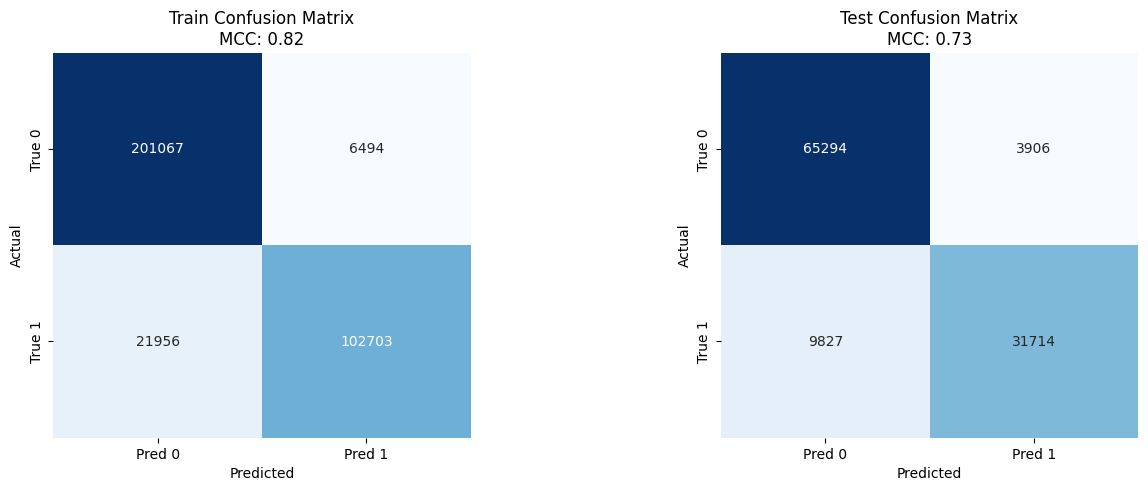

In [134]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Predictions and MCC ===
xgb_clf_prediction_train = xgb_clf2.predict(X_train)
xgb_clf_prediction_test = xgb_clf2.predict(X_test)

mcc_train = matthews_corrcoef(y_train, xgb_clf_prediction_train)
mcc_test = matthews_corrcoef(y_test, xgb_clf_prediction_test)

print(f"Train MCC = {mcc_train:.4f}")
print(f"Test MCC = {mcc_test:.4f}")

# === Confusion Matrices ===
cm_train = confusion_matrix(y_train, xgb_clf_prediction_train)
cm_test = confusion_matrix(y_test, xgb_clf_prediction_test)

# === Side-by-side Confusion Matrix Plots ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train CM
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'], ax=axes[0])
axes[0].set_title(f"Train Confusion Matrix\nMCC: {mcc_train:.2f}")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Test CM
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'], ax=axes[1])
axes[1].set_title(f"Test Confusion Matrix\nMCC: {mcc_test:.2f}")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Add spacing between subplots
fig.subplots_adjust(wspace=0.6)  # increase this if needed
plt.show()


### Brier score for TRIAL 2

In [135]:
from sklearn.metrics import brier_score_loss

# Probabilistic predictions for Train and Test
y_train_proba = xgb_clf2.predict_proba(X_train)[:, 1]  # Probability of the positive class
y_test_proba = xgb_clf2.predict_proba(X_test)[:, 1]

# Brier Score for Train set
brier_score_train = brier_score_loss(y_train, y_train_proba)
print(f"Train Brier Score = {brier_score_train:.4f}")

# Brier Score for Test set
brier_score_test = brier_score_loss(y_test, y_test_proba)
print(f"Test Brier Score = {brier_score_test:.4f}")

Train Brier Score = 0.0657
Test Brier Score = 0.0903


Train Brier Score = 0.0657
Test Brier Score = 0.0903


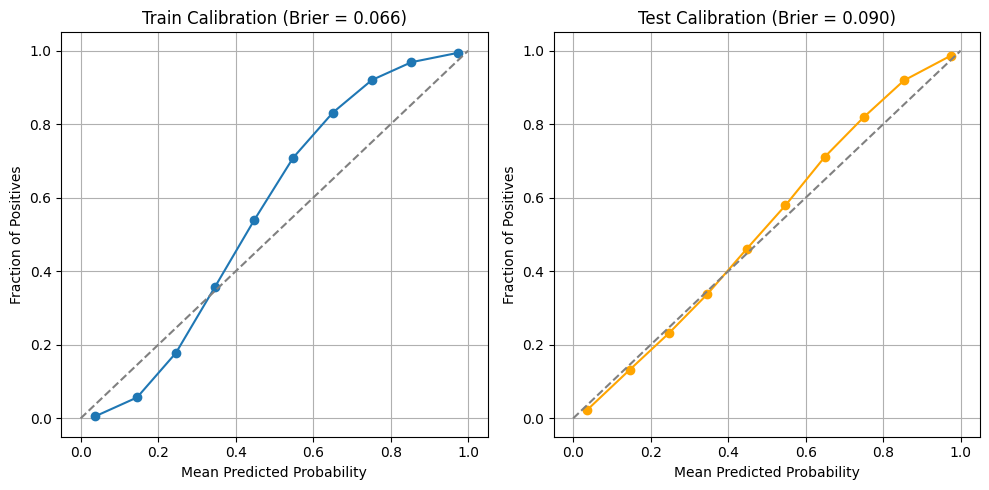

In [136]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Existing Brier Score Code
from sklearn.metrics import brier_score_loss

y_train_proba = xgb_clf2.predict_proba(X_train)[:, 1]
y_test_proba = xgb_clf2.predict_proba(X_test)[:, 1]

brier_score_train = brier_score_loss(y_train, y_train_proba)
brier_score_test = brier_score_loss(y_test, y_test_proba)

print(f"Train Brier Score = {brier_score_train:.4f}")
print(f"Test Brier Score = {brier_score_test:.4f}")

# Calibration Curve Data
prob_true_train, prob_pred_train = calibration_curve(y_train, y_train_proba, n_bins=10)
prob_true_test, prob_pred_test = calibration_curve(y_test, y_test_proba, n_bins=10)

# Plot
plt.figure(figsize=(10, 5))

# Train Plot
plt.subplot(1, 2, 1)
plt.plot(prob_pred_train, prob_true_train, marker='o', label='Train')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'Train Calibration (Brier = {brier_score_train:.3f})')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.grid()

# Test Plot
plt.subplot(1, 2, 2)
plt.plot(prob_pred_test, prob_true_test, marker='o', color='orange', label='Test')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'Test Calibration (Brier = {brier_score_test:.3f})')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.grid()

plt.tight_layout()
plt.show()


### DPI (FOR TRIAL 2)

In [137]:
import numpy as np

def discriminatory_power_index(y_true, y_proba):
    pos_avg = np.mean(y_proba[y_true == 1])
    neg_avg = np.mean(y_proba[y_true == 0])
    return pos_avg - neg_avg

dpi_train = discriminatory_power_index(y_train, y_train_proba)
dpi_test = discriminatory_power_index(y_test, y_test_proba)
print(f"Train DPI = {dpi_train:.4f}")
print(f"Test DPI = {dpi_test:.4f}")


Train DPI = 0.6483
Test DPI = 0.5875


# Trial 5

#### TRIAL 5- Changing n_estimators values

In [62]:

space5={
    'max_depth': hp.choice("max_depth", [3, 4, 5, 6, 8, 10, 12, 15]),
    'reg_alpha':hp.quniform("reg_alpha",40,180,1),
    'reg_lambda':hp.uniform("reg_lambda",0,1),
    'gamma':hp.uniform("gamma",0,9),
    'subsample':hp.uniform("subsample",0.6,1),
    'colsample_bytree':hp.uniform("colsample_bytree",0.5,1),
    'min_child_weight':hp.quniform("min_child_weight",0,10,1),
    'n_estimators' : hp.choice('n_estimators', [50,75, 100,125, 150, 175, 200, 225, 250, 275, 300]),
    'learning_rate':hp.uniform("learning_rate",0,0.3),
    'scale_pos_weight': hp.quniform('scale_pos_weight', int(0), int(sum(df1['target'] == 0) / sum(df1['target'] == 1)), 1)

}

In [63]:
# Xgboost Classifier model and training
gini=0
def hyperparameter_tuning(space):
  global gini
  model=XGBClassifier(
      n_estimators=space['n_estimators'],
      max_depth=int(space['max_depth']),
      gamma = space['gamma'],
      reg_alpha = space['reg_alpha'],
      reg_lambda=space['reg_lambda'],
      subsample = space['subsample'],
      min_child_weight=space['min_child_weight'],
      colsample_bytree=space['colsample_bytree'],
      learning_rate=space['learning_rate'],
      scale_pos_weight=space['scale_pos_weight'],
      random_state=42,
      eval_metric='auc'
  )
  model.fit(X_train,y_train)
  proba = model.predict_proba(X_test)[:, 1]
  auc = roc_auc_score(y_test, proba)
  gini=max(gini,(2*auc)-1)
  print("AUC:", auc)
  return {'loss': -auc, 'status': STATUS_OK, 'model': model}

In [64]:
#Running Hyperopt
# Trial5_Test
trials=Trials()
best=fmin(fn=hyperparameter_tuning,space=space5,algo= tpe.suggest,max_evals=50, trials=trials)
best_params_df = pd.DataFrame([best]).T
best_params_df.columns = ['Value']
best_params_df.index.name = 'Hyperparameter'

print("Best Hyperparameters:\n")
print(best_params_df)


print(f"Best gini:{gini} ")#Running Hyperopt


AUC:                                                  
0.8806147438361961                                    
AUC:                                                                             
0.5                                                                              
AUC:                                                                             
0.8971542067986875                                                               
AUC:                                                                             
0.9012062636982503                                                               
AUC:                                                                             
0.8779819912578882                                                               
AUC:                                                                             
0.5                                                                              
AUC:                                                                  

In [65]:
best_params_df    #(TRIAL 5)

,Value
Hyperparameter,
colsample_bytree,0.777413
gamma,0.776900
learning_rate,0.299877
max_depth,5.000000
min_child_weight,3.000000
n_estimators,2.000000
reg_alpha,79.000000
reg_lambda,0.724235
scale_pos_weight,1.000000


In [138]:
from xgboost.sklearn import XGBClassifier       #(TRIAL 5)

xgb_clf5= XGBClassifier(
 colsample_bytree = 0.541683 ,
 gamma = 0.013225,
 learning_rate = 0.120372,
 max_depth = 15,
 min_child_weight = 8.00,
 n_estimators = 300,
 reg_alpha = 56.0,
 reg_lambda = 0.30058,
 scale_pos_weight = 1.000,
 subsample = 0.957192,
 seed=123
    
)

xgb_clf5.fit(X_train, y_train)
xgb_clf_predicted_proba_test = xgb_clf5.predict_proba(X_test)
xgb_clf_prediction = xgb_clf5.predict(X_test)

predicted_probabilities_test = [i for i in xgb_clf_predicted_proba_test]

xgb_clf_predicted_proba_train = xgb_clf5.predict_proba(X_train)
predicted_probabilities_train = [i for i in xgb_clf_predicted_proba_train]

In [121]:
# Calculating train gini       #(TRIAL 5)
df_train = pd.DataFrame(y_train)
df_train.columns = ['Target']
df_predicted_train = pd.DataFrame({'Predictions':predicted_probabilities_train})
predicted_train = pd.concat([df_predicted_train.reset_index(drop=True), df_train.reset_index(drop=True)], axis=1, join='outer')
predicted_train.columns = ['Predictions','Target']

ser, bins = pd.qcut(predicted_train['Predictions'].apply(lambda x: x[1]), 5, retbins=True, duplicates='drop')
predicted_train_bins = pd.concat([predicted_train, ser], axis=1, join='outer')
predicted_train_bins.columns = ['Predictions','Target','Bands']
probability_table_train = pd.DataFrame(predicted_train_bins.groupby(['Bands'])['Target'].sum())
counts_train = pd.DataFrame(predicted_train_bins.groupby(['Bands']).size().reset_index(name='Counts'))
counts_train.set_index('Bands', inplace=True)

Train_summary = pd.concat([counts_train, probability_table_train], axis=1)


Train_summary['Population%'] =( Train_summary['Counts']/Train_summary['Counts'].sum())*100
Train_summary['Bad%'] = (Train_summary['Target']/Train_summary['Counts'])*100
Train_summary['Band_Bad_capture%'] = (Train_summary['Target']/Train_summary['Target'].sum())*100
Train_summary['Bad_Capture_%'] = ((Train_summary['Target']/Train_summary['Target'].sum())*100).cumsum()
Train_summary['Good_Capture_%'] = ((Train_summary['Counts']-Train_summary['Target'])/(Train_summary['Counts']-Train_summary['Target']).sum()).cumsum()*100
Train_summary['KS'] = np.abs(Train_summary['Good_Capture_%']-Train_summary['Bad_Capture_%'])
Train_summary['Gini'] = (Train_summary['Bad_Capture_%'] + Train_summary['Bad_Capture_%'].shift(1).fillna(0))*(Train_summary['Good_Capture_%'] - Train_summary['Good_Capture_%'].shift(1).fillna(0))*(0.5/100.00)
train_gini = 2*np.abs(0.5-(np.sum(Train_summary['Gini'])/100))*100
print("\nTrain Gini = ", train_gini,"%")





Train Gini =  89.7636807846346 %


C:\Users\angsh\AppData\Local\Temp\ipykernel_11452\628504720.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probability_table_train = pd.DataFrame(predicted_train_bins.groupby(['Bands'])['Target'].sum())
C:\Users\angsh\AppData\Local\Temp\ipykernel_11452\628504720.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_train = pd.DataFrame(predicted_train_bins.groupby(['Bands']).size().reset_index(name='Counts'))


In [122]:
Train_summary   #(TRIAL 5)

,Counts,Target,Population%,Bad%,Band_Bad_capture%,Bad_Capture_%,Good_Capture_%,KS,Gini
Bands,,,,,,,,,
"(-0.0004930000000000001, 0.0468]",66444,126,20.0,0.189633,0.101076,0.101076,31.951089,31.850013,0.016147
"(0.0468, 0.149]",66444,1914,20.0,2.880621,1.535389,1.636464,63.040745,61.404280,0.270098
"(0.149, 0.337]",66444,11453,20.0,17.237072,9.187463,10.823928,89.534643,78.710715,1.650622
"(0.337, 0.845]",66444,45389,20.0,68.311661,36.410528,47.234456,99.678649,52.444193,2.944723
"(0.845, 0.999]",66444,65777,20.0,98.996147,52.765544,100.000000,100.000000,0.000000,0.236570


In [123]:

# Test Gini Calculation    #(TRIAL 5)

df_test = pd.DataFrame(y_test)
df_test.columns = ['Target']
df_predicted_test = pd.DataFrame({'Predictions':predicted_probabilities_test})
predicted_test = pd.concat([df_predicted_test.reset_index(drop=True), df_test.reset_index(drop=True)], axis=1, join='outer')
predicted_test.columns = ['Predictions','Target']


bins[0] = 0
bins[-1] = 1
bins_test = pd.cut(predicted_test['Predictions'].apply(lambda x: x[1]), bins=bins, include_lowest=True)
predicted_test_bins = pd.concat([predicted_test, bins_test], axis=1, join='outer')
predicted_test_bins.columns = ['Predictions','Target','Bands']
probability_table_test = pd.DataFrame(predicted_test_bins.groupby(['Bands'])['Target'].sum())
counts_test = pd.DataFrame(predicted_test_bins.groupby(['Bands']).size().reset_index(name='Counts'))
counts_test.set_index('Bands', inplace=True)

Test_summary = pd.concat([counts_test, probability_table_test], axis=1)




Test_summary['Population%'] =( Test_summary['Counts']/Test_summary['Counts'].sum())*100
Test_summary['Bad%'] = (Test_summary['Target']/Test_summary['Counts'])*100
Test_summary['Band_Bad_capture%'] = (Test_summary['Target']/Test_summary['Target'].sum())*100
Test_summary['Bad_Capture_%'] = ((Test_summary['Target']/Test_summary['Target'].sum())*100).cumsum()
Test_summary['Good_Capture_%'] = ((Test_summary['Counts']-Test_summary['Target'])/(Test_summary['Counts']-Test_summary['Target']).sum()).cumsum()*100
Test_summary['KS'] = np.abs(Test_summary['Good_Capture_%']-Test_summary['Bad_Capture_%'])
Test_summary['Gini'] = (Test_summary['Bad_Capture_%'] + Test_summary['Bad_Capture_%'].shift(1).fillna(0))*(Test_summary['Good_Capture_%'] - Test_summary['Good_Capture_%'].shift(1).fillna(0))*(0.5/100.00)
test_gini = 2*np.abs(0.5-(np.sum(Test_summary['Gini'])/100))*100
print("\nTest Gini = ", test_gini,"%")





Test Gini =  84.0221073462766 %


C:\Users\angsh\AppData\Local\Temp\ipykernel_11452\1202938661.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  probability_table_test = pd.DataFrame(predicted_test_bins.groupby(['Bands'])['Target'].sum())
C:\Users\angsh\AppData\Local\Temp\ipykernel_11452\1202938661.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_test = pd.DataFrame(predicted_test_bins.groupby(['Bands']).size().reset_index(name='Counts'))


#### Hence for TRIAL 2 Train Gini= 89.7636% and Test Gini= 84.0221 %

### MCC calculation for Trial 5

In [139]:

#Matthews Correlation Coefficient (MCC) for Train and Test
from sklearn.metrics import matthews_corrcoef
import numpy as np
import pandas as pd
from scipy.stats import chi2

# MCC for Train set
xgb_clf_prediction_train = xgb_clf5.predict(X_train)
mcc_train = matthews_corrcoef(y_train, xgb_clf_prediction_train)
print(f"Train MCC = {mcc_train:.4f}")

# MCC for Test set  
mcc_test = matthews_corrcoef(y_test, xgb_clf_prediction)
print(f"Test MCC = {mcc_test:.4f}")


Train MCC = 0.7847
Test MCC = 0.7178


Train MCC = 0.7847
Test MCC = 0.7178


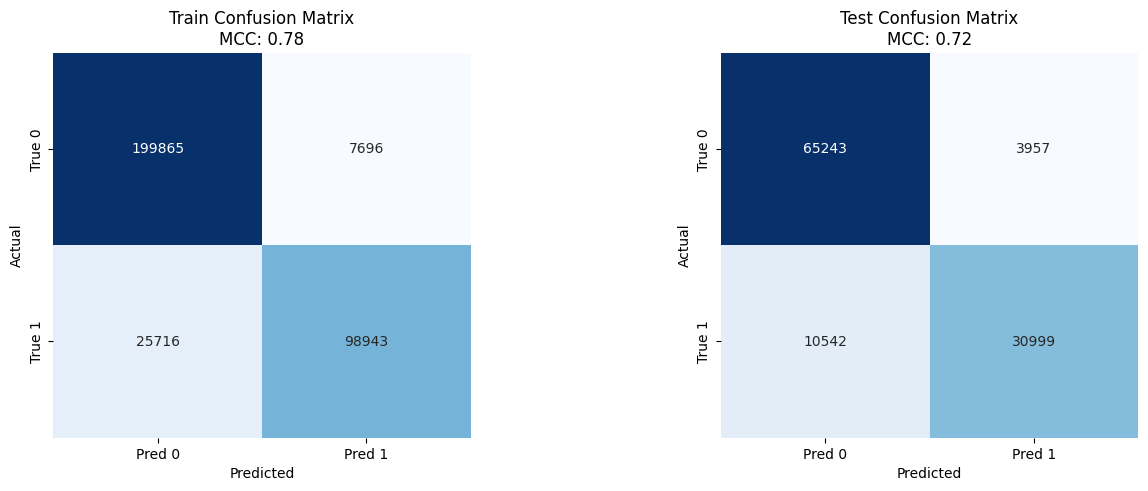

In [140]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Predictions and MCC ===
xgb_clf_prediction_train = xgb_clf5.predict(X_train)
xgb_clf_prediction_test = xgb_clf5.predict(X_test)

mcc_train = matthews_corrcoef(y_train, xgb_clf_prediction_train)
mcc_test = matthews_corrcoef(y_test, xgb_clf_prediction_test)

print(f"Train MCC = {mcc_train:.4f}")
print(f"Test MCC = {mcc_test:.4f}")

# === Confusion Matrices ===
cm_train = confusion_matrix(y_train, xgb_clf_prediction_train)
cm_test = confusion_matrix(y_test, xgb_clf_prediction_test)

# === Side-by-side Confusion Matrix Plots ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train CM
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'], ax=axes[0])
axes[0].set_title(f"Train Confusion Matrix\nMCC: {mcc_train:.2f}")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Test CM
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'], ax=axes[1])
axes[1].set_title(f"Test Confusion Matrix\nMCC: {mcc_test:.2f}")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Add spacing between subplots
fig.subplots_adjust(wspace=0.6)  # increase this if needed
plt.show()


### Brier score for TRIAL 5

In [141]:
from sklearn.metrics import brier_score_loss

# Probabilistic predictions for Train and Test
y_train_proba = xgb_clf5.predict_proba(X_train)[:, 1]  # Probability of the positive class
y_test_proba = xgb_clf5.predict_proba(X_test)[:, 1]

# Brier Score for Train set
brier_score_train = brier_score_loss(y_train, y_train_proba)
print(f"Train Brier Score = {brier_score_train:.4f}")

# Brier Score for Test set
brier_score_test = brier_score_loss(y_test, y_test_proba)
print(f"Test Brier Score = {brier_score_test:.4f}")

Train Brier Score = 0.0755
Test Brier Score = 0.0951


Train Brier Score = 0.0755
Test Brier Score = 0.0951


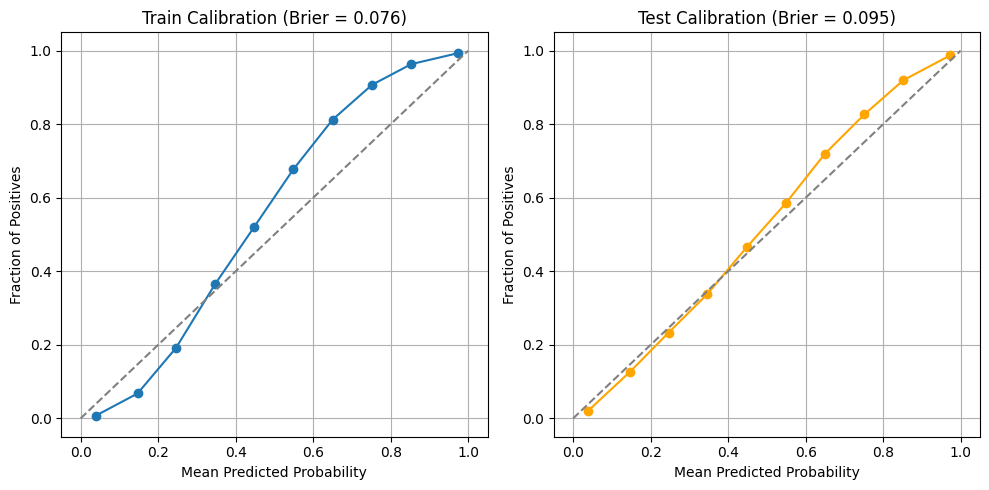

In [142]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Existing Brier Score Code
from sklearn.metrics import brier_score_loss

y_train_proba = xgb_clf5.predict_proba(X_train)[:, 1]
y_test_proba = xgb_clf5.predict_proba(X_test)[:, 1]

brier_score_train = brier_score_loss(y_train, y_train_proba)
brier_score_test = brier_score_loss(y_test, y_test_proba)

print(f"Train Brier Score = {brier_score_train:.4f}")
print(f"Test Brier Score = {brier_score_test:.4f}")

# Calibration Curve Data
prob_true_train, prob_pred_train = calibration_curve(y_train, y_train_proba, n_bins=10)
prob_true_test, prob_pred_test = calibration_curve(y_test, y_test_proba, n_bins=10)

# Plot
plt.figure(figsize=(10, 5))

# Train Plot
plt.subplot(1, 2, 1)
plt.plot(prob_pred_train, prob_true_train, marker='o', label='Train')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'Train Calibration (Brier = {brier_score_train:.3f})')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.grid()

# Test Plot
plt.subplot(1, 2, 2)
plt.plot(prob_pred_test, prob_true_test, marker='o', color='orange', label='Test')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(f'Test Calibration (Brier = {brier_score_test:.3f})')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.grid()

plt.tight_layout()
plt.show()


### DPI(for trial 5)

In [143]:
import numpy as np

def discriminatory_power_index(y_true, y_proba):
    pos_avg = np.mean(y_proba[y_true == 1])
    neg_avg = np.mean(y_proba[y_true == 0])
    return pos_avg - neg_avg

dpi_train = discriminatory_power_index(y_train, y_train_proba)
dpi_test = discriminatory_power_index(y_test, y_test_proba)
print(f"Train DPI = {dpi_train:.4f}")
print(f"Test DPI = {dpi_test:.4f}")


Train DPI = 0.6108
Test DPI = 0.5626


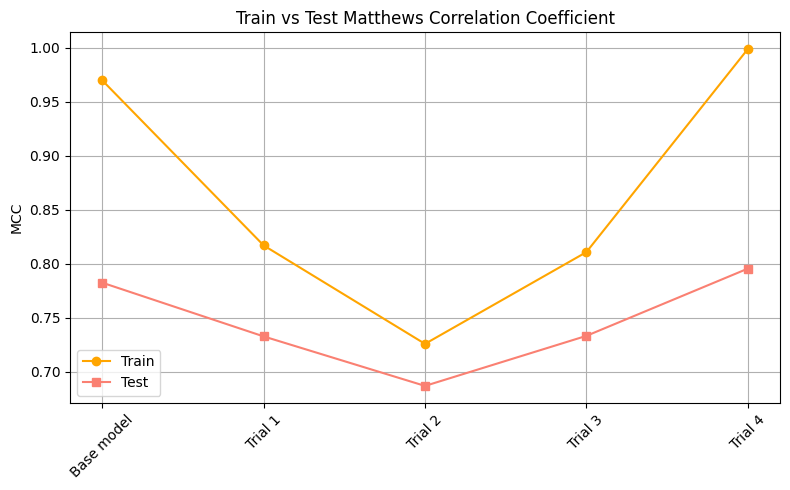

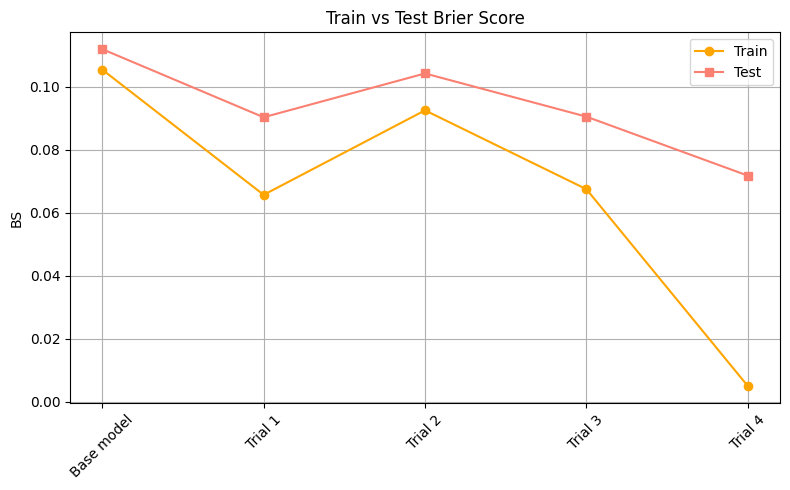

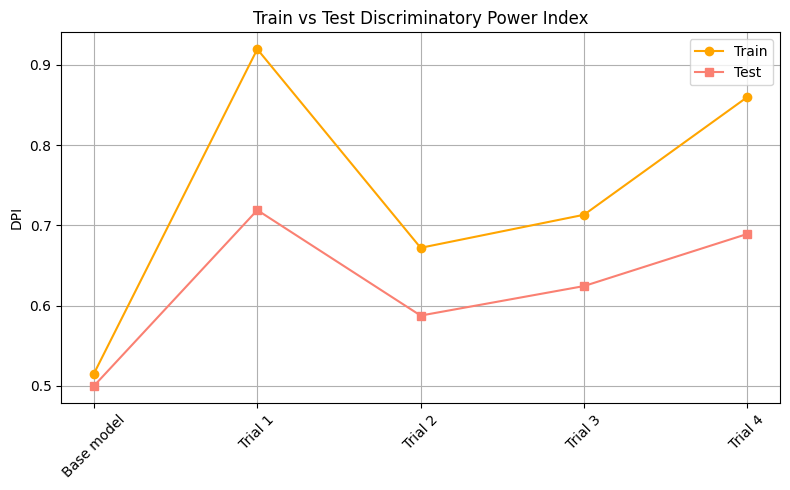

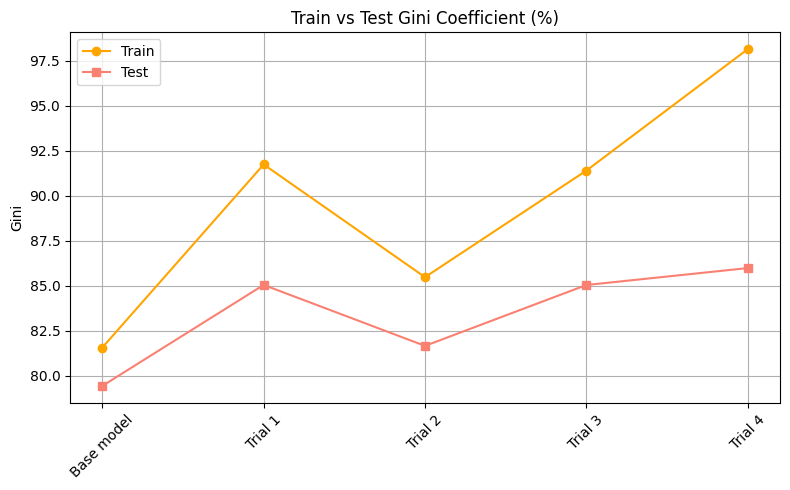

In [231]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = {
    'Trial': ['Base model', 'Trial 1', 'Trial 2', 'Trial 3', 'Trial 4'],
    'Train_MCC': [0.9697, 0.817, 0.7259, 0.8108, 0.9986],
    'Test_MCC': [0.7825, 0.7328, 0.6870, 0.7333, 0.7955],
    'Train_BS': [0.1054, 0.0657, 0.0925, 0.0675, 0.0051],
    'Test_BS': [0.1119, 0.0903, 0.1042, 0.0905, 0.0718],
    'Train_DPI': [0.5152, 0.9197, 0.6720, 0.7132, 0.8600],
    'Test_DPI': [0.4998, 0.7190, 0.5875, 0.6243, 0.6893],
    'Train_Gini': [81.567, 91.7425, 85.48, 91.401, 98.1485],
    'Test_Gini': [79.4373, 85.0487, 81.662, 85.0447, 85.9847]
}
df = pd.DataFrame(data)

# MCC Plot
plt.figure(figsize=(8, 5))
plt.plot(df['Trial'], df['Train_MCC'], label='Train', marker='o', color='orange')
plt.plot(df['Trial'], df['Test_MCC'], label='Test', marker='s', color='salmon')
plt.title('Train vs Test Matthews Correlation Coefficient')
plt.ylabel('MCC')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Brier Score Plot
plt.figure(figsize=(8, 5))
plt.plot(df['Trial'], df['Train_BS'], label='Train', marker='o', color='orange')
plt.plot(df['Trial'], df['Test_BS'], label='Test', marker='s', color='salmon')
plt.title('Train vs Test Brier Score')
plt.ylabel('BS')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# DPI Plot
plt.figure(figsize=(8, 5))
plt.plot(df['Trial'], df['Train_DPI'], label='Train', marker='o', color='orange')
plt.plot(df['Trial'], df['Test_DPI'], label='Test', marker='s', color='salmon')
plt.title('Train vs Test Discriminatory Power Index')
plt.ylabel('DPI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gini Plot
plt.figure(figsize=(8, 5))
plt.plot(df['Trial'], df['Train_Gini'], label='Train', marker='o', color='orange')
plt.plot(df['Trial'], df['Test_Gini'], label='Test', marker='s', color='salmon')
plt.title('Train vs Test Gini Coefficient (%)')
plt.ylabel('Gini')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


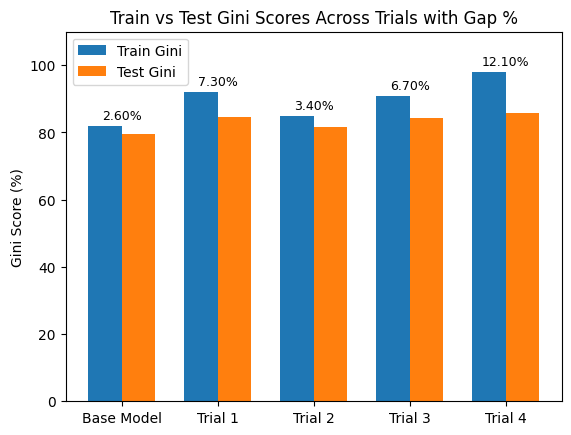

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Replace the below values with the actual Gini scores from your calculations
models = ["Base Model", "Trial 1", "Trial 2", "Trial 3", "Trial 4"]

train_gini = [82.0, 92.0, 85.0, 91.0, 98.0]  # Example values — update with real Train Gini
test_gini  = [79.4, 84.7, 81.6, 84.3, 85.9]  # Example values — update with real Test Gini

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_gini, width, label='Train Gini')
plt.bar(x + width/2, test_gini, width, label='Test Gini')

plt.ylabel('Gini Score (%)')
plt.title('Train vs Test Gini Scores Across Trials with Gap %')
plt.xticks(x, models)
plt.ylim(0, 110)
plt.legend()

# Add gap % above bars
for i in range(len(models)):
    gap = train_gini[i] - test_gini[i]
    plt.text(x[i], max(train_gini[i], test_gini[i]) + 1,
             f"{gap:.2f}%", ha='center', va='bottom', fontsize=9)

plt.show()
